In [ ]:
# Import necessary libraries
import keras
import sys
import scipy
from scipy.sparse import hstack
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.stats.contingency_tables import mcnemar
import seaborn as sns

In [ ]:
# Check versions
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('np: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pd: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
np: 1.23.5
matplotlib: 3.7.1
pd: 1.5.3
sklearn: 1.2.2


In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset (replace 'your_dataset.csv' with the actual file path)
# "/content/drive/MyDrive/data.csv"
data = "/content/drive/MyDrive/DNNspine/datacombined.csv"
df = pd.read_csv(data)

In [ ]:
# shape
print(df.shape)

(460, 13)


In [ ]:
# Display basic information about the DataFrame
print(df.info())
# Display basic statistics
print(df.describe())
# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DOW           460 non-null    object 
 1   Age           460 non-null    int64  
 2   Breed         460 non-null    object 
 3   Sex           460 non-null    object 
 4   Weight        460 non-null    float64
 5   SignsDays     460 non-null    int64  
 6   FrankelScore  460 non-null    int64  
 7   Myelo         460 non-null    int64  
 8   Admission2Sx  460 non-null    int64  
 9   Surgeon       460 non-null    object 
 10  Surgery       460 non-null    object 
 11  Fen           460 non-null    int64  
 12  NegOutcome    460 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 46.8+ KB
None
              Age      Weight   SignsDays  FrankelScore       Myelo  \
count  460.000000  460.000000  460.000000    460.000000  460.000000   
mean    65.482609   10.922543    2.74782

In [ ]:
# Split data into features and targets
X = df.iloc[:, 0:12]  # Selecting columns 0 to 12 (excluding 13)
y = df.iloc[:, 12]   # Selecting the 13th column

In [ ]:
print("Input (X):")
print(X)

print("\nOutput (y):")
print(y)

Input (X):
    DOW  Age                 Breed Sex  Weight  SignsDays  FrankelScore  \
0    WD   79             Dachshund  MN     5.7          7             3   
1    WD   83             Dachshund  MN     5.7          1             4   
2    WD   82             Dachshund  MN     5.7          1             2   
3    WD  155  Jack Russell Terrier  MN    10.6          1             3   
4    WD   72        Border Terrier   M     8.5          2             2   
..   ..  ...                   ...  ..     ...        ...           ...   
455  WE   78             Dachshund  FN     8.8          2             5   
456  WE   85   German Shepherd Dog  FN    33.0          3             4   
457  WE   34        Border Terrier  MN    10.5          2             3   
458  WE   72              Shih Tzu  MN     9.3          3             4   
459  WE   61                 Boxer  MN    25.5          1             3   

     Myelo  Admission2Sx Surgeon          Surgery  Fen  
0        0             2      S

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify missing categories in the test set
missing_categories = set(X_train) - set(X_test)

In [ ]:
# Get all column names
column_names = X_train.columns.tolist()

# Print the column names
print("Column Names:", column_names)

Column Names: ['DOW', 'Age', 'Breed', 'Sex', 'Weight', 'SignsDays', 'FrankelScore', 'Myelo', 'Admission2Sx', 'Surgeon', 'Surgery', 'Fen']


In [ ]:
numerical_features = ['Age', 'Weight', 'SignsDays', 'Admission2Sx']
categorical_features = ['DOW', 'Breed', 'Sex', 'FrankelScore', 'Myelo', 'Surgeon', 'Surgery', 'Fen']

In [ ]:
X_train_numeric = X_train[numerical_features]
X_train_categorical = X_train[categorical_features]
X_test_numeric = X_test[numerical_features]
X_test_categorical = X_test[categorical_features]

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_test_imputed_categorical = pd.DataFrame(imputer.fit_transform(X_test_categorical),
                               columns=categorical_features)

# Assuming 'X_train' and 'X_test' are your feature matrices
scaler = StandardScaler()
X_train_transformed_numeric = scaler.fit_transform(X_train_numeric)
X_test_transformed_numeric = scaler.transform(X_test_numeric)

# Create a ColumnTransformer to apply one-hot encoding only to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Include non-categorical columns as-is
)

# Fit and transform the data
X_train_transformed_categorical = preprocessor.fit_transform(X_train_categorical)
X_test_transformed_categorical = preprocessor.transform(X_test_imputed_categorical)

In [ ]:
# If needed, reshape the arrays to 2D
X_train_transformed_numeric_2 = np.reshape(X_train_transformed_numeric, (-1, X_train_transformed_numeric.shape[1]))
X_train_transformed_categorical_2 = np.reshape(X_train_transformed_categorical, (-1, X_train_transformed_categorical.shape[1]))
X_test_transformed_numeric_2 = np.reshape(X_test_transformed_numeric, (-1, X_test_transformed_numeric.shape[1]))
X_test_transformed_categorical_2 = np.reshape(X_test_transformed_categorical, (-1, X_test_transformed_categorical.shape[1]))

In [ ]:
print(X_train_transformed_numeric_2.shape)
print(X_train_transformed_categorical_2.shape)
print(X_test_transformed_numeric_2.shape)
print(X_test_transformed_categorical_2.shape)

(368, 4)
(368, 52)
(92, 4)
(92, 52)


In [ ]:
# Concatenate
X_train_transformed = hstack([X_train_transformed_numeric_2, X_train_transformed_categorical_2])
X_test_transformed = hstack([X_test_transformed_numeric_2, X_test_transformed_categorical_2])

In [ ]:
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(368, 56)
(92, 56)


In [ ]:
X_train_dense = X_train_transformed.toarray()
X_test_dense = X_test_transformed.toarray()

In [ ]:
# Base model
# model.add(Dense(units=84, activation='relu', input_shape=(84,)))
# model.add(Dense(units=40, activation='relu'))
# model.add(Dropout(rate=0.38295456443011633))

# Best Hyperparameters: {'learning_rate': 0.001854831201427503, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 11, 'epochs': 92, 'batch_size': 24, 'dropout_rate': 0.3739275465882979}

model = Sequential()
model.add(Dense(units=56, activation='relu', input_shape=(56,)))
model.add(Dense(units=28, activation='relu'))
model.add(Dropout(rate=0.3739275465882979))
model.add(Dense(units=14, activation='relu'))
model.add(Dropout(rate=0.3739275465882979))
model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_dense, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 2s 18ms/step - loss: 0.6708 - accuracy: 0.6122 - val_loss: 0.6625 - val_accuracy: 0.7027
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.6667 - val_loss: 0.6297 - val_accuracy: 0.7838
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6363 - accuracy: 0.6905 - val_loss: 0.6016 - val_accuracy: 0.7838
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.7041 - val_loss: 0.5853 - val_accuracy: 0.7838
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.7041 - val_loss: 0.5724 - val_accuracy: 0.7838
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5925 - accuracy: 0.7075 - val_loss: 0.5648 - val_accuracy: 0.7838
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6142 - accuracy: 0.7075 - val_loss: 0.5666 - val_accuracy: 0.7838
Epoch 8/100


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_dense)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

3/3 [==============================] - 0s 3ms/step


In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train_dense, y_train)
print('Train accuracy: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(X_test_dense, y_test)
print('Test accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9484
Train accuracy: 94.84
3/3 [==============================] - 0s 8ms/step - loss: 2.2749 - accuracy: 0.6848
Test accuracy: 68.48


12/12 [==============================] - 0s 2ms/step
Confusion Matrix (Training Set):
[[260   6]
 [ 13  89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       266
           1       0.94      0.87      0.90       102

    accuracy                           0.95       368
   macro avg       0.94      0.92      0.93       368
weighted avg       0.95      0.95      0.95       368



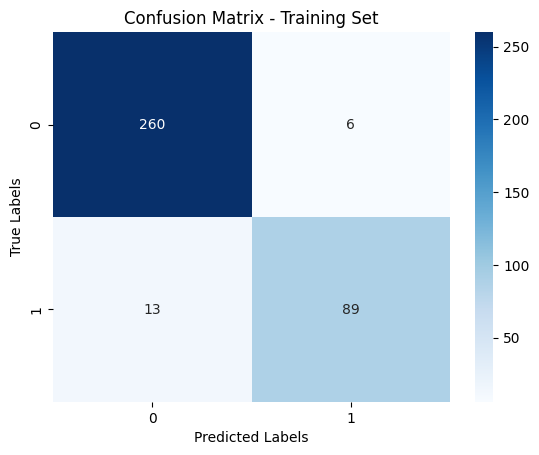

In [ ]:
y_pred_train = (model.predict(X_train_dense) > 0.5).astype(int)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# Print confusion matrix
print("Confusion Matrix (Training Set):")
print(cm_train)

classification_rep = classification_report(y_train, y_pred_train)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Confusion Matrix (Test Set):
[[58  9]
 [20  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        67
           1       0.36      0.20      0.26        25

    accuracy                           0.68        92
   macro avg       0.55      0.53      0.53        92
weighted avg       0.64      0.68      0.65        92



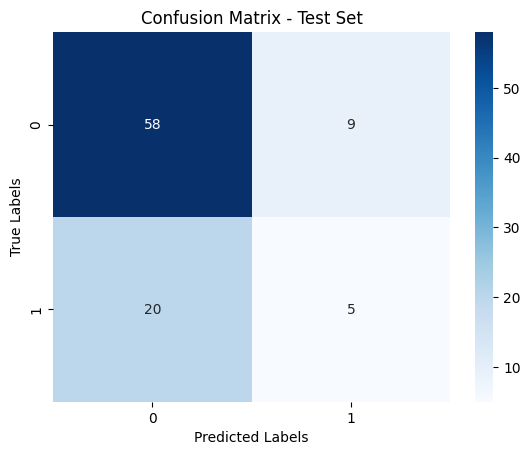

In [ ]:
# Calculate confusion matrix
cm_test = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix (Test Set):")
print(cm_test)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[58  9]
 [20  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        67
           1       0.36      0.20      0.26        25

    accuracy                           0.68        92
   macro avg       0.55      0.53      0.53        92
weighted avg       0.64      0.68      0.65        92



In [ ]:
# [[True Negatives (TN)  False Positives (FP)]
# [False Negatives (FN) True Positives (TP)]]

In [ ]:
# Assuming y_true is your true labels (ground truth)
# and y_pred_prob is the predicted probabilities
auc = roc_auc_score(y_train, y_pred_train)
print(f'AUC train: {auc:.4f}')
auc = roc_auc_score(y_test, y_pred)
print(f'AUC test: {auc:.4f}')

AUC train: 0.9250
AUC test: 0.5328


In [ ]:
# Instantiate and train logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_dense, y_train)
logistic_regression_model2 = LogisticRegression()
logistic_regression_model2.fit(X_test_dense, y_test)

# Make predictions on the test set
y_pred_train_lr = logistic_regression_model.predict(X_train_dense)
y_pred_lr = logistic_regression_model2.predict(X_test_dense)

# Evaluate performance
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy Train: {accuracy_train_lr:.2f}')
print(f'Logistic Regression Accuracy Test: {accuracy_test_lr:.2f}')

# Print classification report for more detailed evaluation
print("Classification Report Train:")
print(classification_report(y_train, y_pred_train_lr))
conf_matrix_train_lr = confusion_matrix(y_train, y_pred_train_lr)
print(conf_matrix_train_lr)
print("Classification Report Test:")
print(classification_report(y_test, y_pred_lr))
conf_matrix_test_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_test_lr)

Logistic Regression Accuracy Train: 0.78
Logistic Regression Accuracy Test: 0.77
Classification Report Train:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       266
           1       0.69      0.35      0.47       102

    accuracy                           0.78       368
   macro avg       0.74      0.65      0.66       368
weighted avg       0.76      0.78      0.75       368

[[250  16]
 [ 66  36]]
Classification Report Test:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        67
           1       0.67      0.32      0.43        25

    accuracy                           0.77        92
   macro avg       0.73      0.63      0.64        92
weighted avg       0.75      0.77      0.74        92

[[63  4]
 [17  8]]


In [ ]:
# Bootstrapping for train set
# Assuming you have true labels and predicted labels
true_labels_train = y_train
predicted_labels_train = model.predict(X_train_dense)

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize arrays to store bootstrapped metric values
bootstrapped_sensitivity = np.zeros(n_bootstraps)
bootstrapped_specificity = np.zeros(n_bootstraps)
bootstrapped_ppv = np.zeros(n_bootstraps)
bootstrapped_npv = np.zeros(n_bootstraps)
bootstrapped_auroc = np.zeros(n_bootstraps)

# Perform bootstrapping
for i in range(n_bootstraps):
    # Resample with replacement, using the same index for both true and predicted labels
    resampling_index = resample(range(len(true_labels_train)))
    resampled_true_labels_train = true_labels_train.iloc[resampling_index]
    resampled_predicted_labels_train = predicted_labels_train[resampling_index]

    # Apply threshold to convert to binary predictions
    binary_predictions_train = (resampled_predicted_labels_train >= 0.5).astype(int)

    # Calculate metrics for the resampled data
    tn, fp, fn, tp = confusion_matrix(resampled_true_labels_train, binary_predictions_train).ravel()

    sensitivity = recall_score(resampled_true_labels_train, binary_predictions_train)
    specificity = tn / (tn + fp)
    ppv = precision_score(resampled_true_labels_train, binary_predictions_train)
    npv = tn / (tn + fn)
    auroc = roc_auc_score(resampled_true_labels_train, binary_predictions_train)

    # Store the bootstrapped metric values
    bootstrapped_sensitivity[i] = sensitivity
    bootstrapped_specificity[i] = specificity
    bootstrapped_ppv[i] = ppv
    bootstrapped_npv[i] = npv
    bootstrapped_auroc[i] = auroc

# Calculate confidence intervals using the percentile method
confidence_interval_sensitivity = np.percentile(bootstrapped_sensitivity, [2.5, 97.5])
confidence_interval_specificity = np.percentile(bootstrapped_specificity, [2.5, 97.5])
confidence_interval_ppv = np.percentile(bootstrapped_ppv, [2.5, 97.5])
confidence_interval_npv = np.percentile(bootstrapped_npv, [2.5, 97.5])
confidence_interval_auroc = np.percentile(bootstrapped_auroc, [2.5, 97.5])

print(f"Train - 95% Confidence Interval for Sensitivity: {confidence_interval_sensitivity}")
print(f"Train - 95% Confidence Interval for Specificity: {confidence_interval_specificity}")
print(f"Train - 95% Confidence Interval for PPV: {confidence_interval_ppv}")
print(f"Train - 95% Confidence Interval for NPV: {confidence_interval_npv}")
print(f"Train - 95% Confidence Interval for AUROC: {confidence_interval_auroc}")

12/12 [==============================] - 0s 1ms/step
Train - 95% Confidence Interval for Sensitivity: [0.8        0.93548387]
Train - 95% Confidence Interval for Specificity: [0.95864272 0.99270073]
Train - 95% Confidence Interval for PPV: [0.88504642 0.97980798]
Train - 95% Confidence Interval for NPV: [0.9236294  0.97692748]
Train - 95% Confidence Interval for AUROC: [0.88663653 0.95785771]


In [ ]:
# Bootstrapping for test set
# Assuming you have true labels and predicted labels
true_labels = y_test
predicted_labels = model.predict(X_test_dense)

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize arrays to store bootstrapped metric values
bootstrapped_sensitivity = np.zeros(n_bootstraps)
bootstrapped_specificity = np.zeros(n_bootstraps)
bootstrapped_ppv = np.zeros(n_bootstraps)
bootstrapped_npv = np.zeros(n_bootstraps)
bootstrapped_auroc = np.zeros(n_bootstraps)

# Perform bootstrapping
for i in range(n_bootstraps):
    # Resample with replacement
    resampled_true_labels = resample(true_labels)
    resampled_predicted_labels = resample(predicted_labels)
    binary_predictions = (resampled_predicted_labels >= 0.5).astype(int)
    # Calculate metrics for the resampled data
    tn, fp, fn, tp = confusion_matrix(resampled_true_labels, binary_predictions).ravel()

    sensitivity = recall_score(resampled_true_labels, binary_predictions)
    specificity = tn / (tn + fp)
    ppv = precision_score(resampled_true_labels, binary_predictions)
    npv = tn / (tn + fn)
    auroc = roc_auc_score(resampled_true_labels, binary_predictions)

    # Store the bootstrapped metric values
    bootstrapped_sensitivity[i] = sensitivity
    bootstrapped_specificity[i] = specificity
    bootstrapped_ppv[i] = ppv
    bootstrapped_npv[i] = npv
    bootstrapped_auroc[i] = auroc

# Calculate confidence intervals using the percentile method
confidence_interval_sensitivity = np.percentile(bootstrapped_sensitivity, [2.5, 97.5])
confidence_interval_specificity = np.percentile(bootstrapped_specificity, [2.5, 97.5])
confidence_interval_ppv = np.percentile(bootstrapped_ppv, [2.5, 97.5])
confidence_interval_npv = np.percentile(bootstrapped_npv, [2.5, 97.5])
confidence_interval_auroc = np.percentile(bootstrapped_auroc, [2.5, 97.5])

print(f"Test - 95% Confidence Interval for Sensitivity: {confidence_interval_sensitivity}")
print(f"Test - 95% Confidence Interval for Specificity: {confidence_interval_specificity}")
print(f"Test - 95% Confidence Interval for PPV: {confidence_interval_ppv}")
print(f"Test - 95% Confidence Interval for NPV: {confidence_interval_npv}")
print(f"Test - 95% Confidence Interval for AUROC: {confidence_interval_auroc}")


3/3 [==============================] - 0s 3ms/step
Test - 95% Confidence Interval for Sensitivity: [0.         0.30434783]
Test - 95% Confidence Interval for Specificity: [0.75806452 0.92427069]
Test - 95% Confidence Interval for PPV: [0.  0.5]
Test - 95% Confidence Interval for NPV: [0.63287808 0.825     ]
Test - 95% Confidence Interval for AUROC: [0.4196509  0.58653005]


In [ ]:
# Assuming you have the actual labels and predicted labels for both models
actual_labels = y_test  # Replace with your actual test labels
pred_labels_model1 = y_pred_train  # Replace with your predictions from model 1
pred_labels_model2 = y_pred_train_lr  # Replace with your predictions from model 2

# Create a 2x2 contingency table
conf_matrix = np.zeros((2, 2), dtype=int)

for actual, pred_model1, pred_model2 in zip(actual_labels, pred_labels_model1, pred_labels_model2):
    if actual == 1 and pred_model1 == 0 and pred_model2 == 1:
        conf_matrix[0, 0] += 1  # False Negative for model 1, True Positive for model 2
    elif actual == 0 and pred_model1 == 1 and pred_model2 == 0:
        conf_matrix[1, 0] += 1  # False Positive for model 1, True Negative for model 2

# Perform McNemar's test
result = mcnemar(conf_matrix, exact=False)
statistic, p_value = result.statistic, result.pvalue

# Compare with significance level (e.g., 0.05)
alpha = 0.05
print(f"McNemar's test statistic - train: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There is a significant difference between the models.")
else:
    print("There is no significant difference between the models.")

McNemar's test statistic - train: 14.0625
P-value: 0.00017683457040160785
There is a significant difference between the models.


In [ ]:
# Assuming you have the actual labels and predicted labels for both models
actual_labels = y_test  # Replace with your actual test labels
pred_labels_model3 = y_pred  # Replace with your predictions from model 1
pred_labels_model4 = y_pred_lr  # Replace with your predictions from model 2

# Create a 2x2 contingency table
conf_matrix = np.zeros((2, 2), dtype=int)

for actual, pred_model3, pred_model4 in zip(actual_labels, pred_labels_model3, pred_labels_model4):
    if actual == 1 and pred_model3 == 0 and pred_model4 == 1:
        conf_matrix[0, 0] += 1  # False Negative for model 1, True Positive for model 2
    elif actual == 0 and pred_model3 == 1 and pred_model4 == 0:
        conf_matrix[1, 0] += 1  # False Positive for model 1, True Negative for model 2

# Perform McNemar's test
result = mcnemar(conf_matrix, exact=False)
statistic, p_value = result.statistic, result.pvalue

# Compare with significance level (e.g., 0.05)
alpha = 0.05
print(f"McNemar's test statistic - test: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There is a significant difference between the models.")
else:
    print("There is no significant difference between the models.")

McNemar's test statistic - test: 5.142857142857143
P-value: 0.02334220201289086
There is a significant difference between the models.


In [ ]:
# Optuna study
!pip install optuna
import optuna
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
import numpy as np

def create_model(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    model = Sequential()
    model.add(Dense(units=56, activation='relu', input_shape=(56,)))
    model.add(Dense(units=28, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=14, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model, EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def objective(trial):
    model, early_stopping = create_model(trial)

    # Define the hyperparameters to optimize
    units_layer1 = trial.suggest_int('units_layer1', 56, 56)
    units_layer2 = trial.suggest_int('units_layer2', 24, 48)
    units_layer3 = trial.suggest_int('units_layer3', 8, 24)
    epochs = trial.suggest_int('epochs', 20, 120)
    batch_size = trial.suggest_int('batch_size', 8, 64)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)

    # Train the model
    model.fit(X_train_dense, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

    # Evaluate the model on the test set
    y_train_pred_proba = model.predict(X_train_dense)
    y_test_pred_proba = model.predict(X_test_dense)
    y_train_pred = (y_train_pred_proba > 0.5).astype(int)
    y_test_pred = (y_test_pred_proba > 0.5).astype(int)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Combine train and test recall with weights
    weighted_recall = 0.3 * train_recall + 0.7 * test_recall

    return -weighted_recall  # Negative because Optuna minimizes the objective function

# Set up the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Create the final model with the best parameters
final_model, early_stopping = create_model(study.best_trial)
final_model.fit(X_train_dense, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1, callbacks=[early_stopping])

# Make final predictions
final_y_test_pred_proba = final_model.predict(X_test_dense)
final_y_test_pred = (final_y_test_pred_proba > 0.5).astype(int)
final_test_recall = recall_score(y_test, final_y_test_pred)
print(f"Final Test Recall: {final_test_recall:.2f}")

[I 2024-01-10 21:20:37,182] A new study created in memory with name: no-name-1ffdc193-298f-4642-9a0d-7e6058c3bab0


Epoch 1/109


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 26ms/step - loss: 0.6686 - accuracy: 0.6327 - val_loss: 0.6071 - val_accuracy: 0.7568
Epoch 2/109
8/8 [==============================] - 0s 5ms/step - loss: 0.6317 - accuracy: 0.6803 - val_loss: 0.5745 - val_accuracy: 0.7838
Epoch 3/109
8/8 [==============================] - 0s 7ms/step - loss: 0.6316 - accuracy: 0.6837 - val_loss: 0.5489 - val_accuracy: 0.7838
Epoch 4/109
8/8 [==============================] - 0s 7ms/step - loss: 0.6148 - accuracy: 0.7007 - val_loss: 0.5334 - val_accuracy: 0.7838
Epoch 5/109
8/8 [==============================] - 0s 7ms/step - loss: 0.5761 - accuracy: 0.7143 - val_loss: 0.5208 - val_accuracy: 0.7838
Epoch 6/109
8/8 [==============================] - 0s 8ms/step - loss: 0.6035 - accuracy: 0.7177 - val_loss: 0.5135 - val_accuracy: 0.7838
Epoch 7/109
8/8 [==============================] - 0s 5ms/step - loss: 0.5884 - accuracy: 0.7109 - val_loss: 0.5116 - val_accuracy: 0.7838
Epoch 8/109
8/8 [=====================

[I 2024-01-10 21:20:40,562] Trial 0 finished with value: -0.3121176470588235 and parameters: {'learning_rate': 0.0009195307700053024, 'units_layer1': 56, 'units_layer2': 32, 'units_layer3': 21, 'epochs': 109, 'batch_size': 38, 'dropout_rate': 0.3849534845571962}. Best is trial 0 with value: -0.3121176470588235.


Epoch 1/39


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 23ms/step - loss: 0.6847 - accuracy: 0.5306 - val_loss: 0.6009 - val_accuracy: 0.7703
Epoch 2/39
8/8 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.6701 - val_loss: 0.5470 - val_accuracy: 0.7838
Epoch 3/39
8/8 [==============================] - 0s 5ms/step - loss: 0.6111 - accuracy: 0.7075 - val_loss: 0.5190 - val_accuracy: 0.7838
Epoch 4/39
8/8 [==============================] - 0s 5ms/step - loss: 0.5914 - accuracy: 0.7075 - val_loss: 0.5048 - val_accuracy: 0.7838
Epoch 5/39
8/8 [==============================] - 0s 8ms/step - loss: 0.5999 - accuracy: 0.7109 - val_loss: 0.5072 - val_accuracy: 0.7838
Epoch 6/39
8/8 [==============================] - 0s 7ms/step - loss: 0.5893 - accuracy: 0.7075 - val_loss: 0.5077 - val_accuracy: 0.7838
Epoch 7/39
8/8 [==============================] - 0s 5ms/step - loss: 0.5682 - accuracy: 0.7075 - val_loss: 0.4978 - val_accuracy: 0.7838
Epoch 8/39
8/8 [============================

[I 2024-01-10 21:20:44,113] Trial 1 finished with value: -0.1604705882352941 and parameters: {'learning_rate': 0.0018708268269189991, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 23, 'epochs': 39, 'batch_size': 40, 'dropout_rate': 0.47324906836047675}. Best is trial 0 with value: -0.3121176470588235.


Epoch 1/69


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


16/16 [==============================] - 1s 12ms/step - loss: 0.6873 - accuracy: 0.5714 - val_loss: 0.6594 - val_accuracy: 0.6622
Epoch 2/69
16/16 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6735 - val_loss: 0.6084 - val_accuracy: 0.7838
Epoch 3/69
16/16 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.7007 - val_loss: 0.5715 - val_accuracy: 0.7838
Epoch 4/69
16/16 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.7007 - val_loss: 0.5520 - val_accuracy: 0.7838
Epoch 5/69
16/16 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.7007 - val_loss: 0.5417 - val_accuracy: 0.7838
Epoch 6/69
16/16 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.7041 - val_loss: 0.5356 - val_accuracy: 0.7838
Epoch 7/69
16/16 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.7075 - val_loss: 0.5298 - val_accuracy: 0.7838
Epoch 8/69
16/16 [============

[I 2024-01-10 21:20:50,301] Trial 2 finished with value: -0.4077647058823529 and parameters: {'learning_rate': 0.0006134236929368674, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 15, 'epochs': 69, 'batch_size': 19, 'dropout_rate': 0.38143617845459993}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/36


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


5/5 [==============================] - 6s 80ms/step - loss: 0.6680 - accuracy: 0.6224 - val_loss: 0.6793 - val_accuracy: 0.6351
Epoch 2/36
5/5 [==============================] - 0s 19ms/step - loss: 0.6722 - accuracy: 0.6156 - val_loss: 0.6766 - val_accuracy: 0.6351
Epoch 3/36
5/5 [==============================] - 0s 15ms/step - loss: 0.6675 - accuracy: 0.6054 - val_loss: 0.6740 - val_accuracy: 0.6351
Epoch 4/36
5/5 [==============================] - 0s 14ms/step - loss: 0.6707 - accuracy: 0.6088 - val_loss: 0.6715 - val_accuracy: 0.6351
Epoch 5/36
5/5 [==============================] - 0s 18ms/step - loss: 0.6725 - accuracy: 0.6224 - val_loss: 0.6690 - val_accuracy: 0.6622
Epoch 6/36
5/5 [==============================] - 0s 10ms/step - loss: 0.6675 - accuracy: 0.6531 - val_loss: 0.6665 - val_accuracy: 0.6757
Epoch 7/36
5/5 [==============================] - 0s 12ms/step - loss: 0.6692 - accuracy: 0.6088 - val_loss: 0.6641 - val_accuracy: 0.6892
Epoch 8/36
5/5 [======================

[I 2024-01-10 21:20:58,789] Trial 3 finished with value: -0.0058823529411764705 and parameters: {'learning_rate': 6.0536927432792054e-05, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 12, 'epochs': 36, 'batch_size': 60, 'dropout_rate': 0.4735296095748059}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/29


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


6/6 [==============================] - 1s 43ms/step - loss: 0.7823 - accuracy: 0.3469 - val_loss: 0.7615 - val_accuracy: 0.2297
Epoch 2/29
6/6 [==============================] - 0s 9ms/step - loss: 0.7449 - accuracy: 0.3980 - val_loss: 0.7351 - val_accuracy: 0.2973
Epoch 3/29
6/6 [==============================] - 0s 8ms/step - loss: 0.7216 - accuracy: 0.4422 - val_loss: 0.7134 - val_accuracy: 0.3784
Epoch 4/29
6/6 [==============================] - 0s 11ms/step - loss: 0.7024 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.4865
Epoch 5/29
6/6 [==============================] - 0s 7ms/step - loss: 0.7017 - accuracy: 0.4728 - val_loss: 0.6790 - val_accuracy: 0.5811
Epoch 6/29
6/6 [==============================] - 0s 8ms/step - loss: 0.6896 - accuracy: 0.5340 - val_loss: 0.6664 - val_accuracy: 0.6622
Epoch 7/29
6/6 [==============================] - 0s 7ms/step - loss: 0.6851 - accuracy: 0.5510 - val_loss: 0.6534 - val_accuracy: 0.7432
Epoch 8/29
6/6 [===========================

[I 2024-01-10 21:21:01,804] Trial 4 finished with value: -0.0 and parameters: {'learning_rate': 0.0003343546162322483, 'units_layer1': 56, 'units_layer2': 41, 'units_layer3': 10, 'epochs': 29, 'batch_size': 58, 'dropout_rate': 0.1720470703156296}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/53


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


30/30 [==============================] - 1s 8ms/step - loss: 0.7013 - accuracy: 0.5000 - val_loss: 0.6412 - val_accuracy: 0.7838
Epoch 2/53
30/30 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6973 - val_loss: 0.5859 - val_accuracy: 0.7838
Epoch 3/53
30/30 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.7075 - val_loss: 0.5385 - val_accuracy: 0.7838
Epoch 4/53
30/30 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.7041 - val_loss: 0.5175 - val_accuracy: 0.7838
Epoch 5/53
30/30 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7041 - val_loss: 0.5148 - val_accuracy: 0.7838
Epoch 6/53
30/30 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7075 - val_loss: 0.5275 - val_accuracy: 0.7838
Epoch 7/53
30/30 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7109 - val_loss: 0.5020 - val_accuracy: 0.7838
Epoch 8/53
30/30 [=============

[I 2024-01-10 21:21:05,461] Trial 5 finished with value: -0.3504705882352941 and parameters: {'learning_rate': 0.001551578646848027, 'units_layer1': 56, 'units_layer2': 29, 'units_layer3': 20, 'epochs': 53, 'batch_size': 10, 'dropout_rate': 0.07586585809363933}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/47


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 29ms/step - loss: 0.7037 - accuracy: 0.5306 - val_loss: 0.6012 - val_accuracy: 0.7838
Epoch 2/47
8/8 [==============================] - 0s 10ms/step - loss: 0.6207 - accuracy: 0.7075 - val_loss: 0.5165 - val_accuracy: 0.7838
Epoch 3/47
8/8 [==============================] - 0s 11ms/step - loss: 0.6072 - accuracy: 0.7075 - val_loss: 0.5052 - val_accuracy: 0.7838
Epoch 4/47
8/8 [==============================] - 0s 7ms/step - loss: 0.6007 - accuracy: 0.7075 - val_loss: 0.5035 - val_accuracy: 0.7838
Epoch 5/47
8/8 [==============================] - 0s 9ms/step - loss: 0.5879 - accuracy: 0.7041 - val_loss: 0.5115 - val_accuracy: 0.7838
Epoch 6/47
8/8 [==============================] - 0s 7ms/step - loss: 0.5737 - accuracy: 0.7143 - val_loss: 0.5037 - val_accuracy: 0.7838
Epoch 7/47
8/8 [==============================] - 0s 7ms/step - loss: 0.5736 - accuracy: 0.7041 - val_loss: 0.4893 - val_accuracy: 0.7838
Epoch 8/47
8/8 [==========================

[I 2024-01-10 21:21:09,121] Trial 6 finished with value: -0.3224705882352941 and parameters: {'learning_rate': 0.0032670059410101868, 'units_layer1': 56, 'units_layer2': 48, 'units_layer3': 10, 'epochs': 47, 'batch_size': 39, 'dropout_rate': 0.22145309080040038}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/62


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


27/27 [==============================] - 1s 8ms/step - loss: 0.6651 - accuracy: 0.6463 - val_loss: 0.5886 - val_accuracy: 0.7838
Epoch 2/62
27/27 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.7041 - val_loss: 0.5320 - val_accuracy: 0.7838
Epoch 3/62
27/27 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6973 - val_loss: 0.5173 - val_accuracy: 0.7838
Epoch 4/62
27/27 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.7075 - val_loss: 0.5083 - val_accuracy: 0.7838
Epoch 5/62
27/27 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7007 - val_loss: 0.5016 - val_accuracy: 0.7838
Epoch 6/62
27/27 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.7143 - val_loss: 0.4894 - val_accuracy: 0.7838
Epoch 7/62
27/27 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7007 - val_loss: 0.4851 - val_accuracy: 0.7838
Epoch 8/62
27/27 [=============

[I 2024-01-10 21:21:13,932] Trial 7 finished with value: -0.35776470588235293 and parameters: {'learning_rate': 0.0006243311296620453, 'units_layer1': 56, 'units_layer2': 46, 'units_layer3': 19, 'epochs': 62, 'batch_size': 11, 'dropout_rate': 0.0945033945581385}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/63


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


15/15 [==============================] - 1s 13ms/step - loss: 0.6512 - accuracy: 0.6667 - val_loss: 0.5671 - val_accuracy: 0.7838
Epoch 2/63
15/15 [==============================] - 0s 5ms/step - loss: 0.5982 - accuracy: 0.7109 - val_loss: 0.5270 - val_accuracy: 0.7838
Epoch 3/63
15/15 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.7177 - val_loss: 0.5236 - val_accuracy: 0.7838
Epoch 4/63
15/15 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.7143 - val_loss: 0.5153 - val_accuracy: 0.7838
Epoch 5/63
15/15 [==============================] - 0s 5ms/step - loss: 0.5748 - accuracy: 0.7075 - val_loss: 0.5006 - val_accuracy: 0.7838
Epoch 6/63
15/15 [==============================] - 0s 4ms/step - loss: 0.5611 - accuracy: 0.7075 - val_loss: 0.5040 - val_accuracy: 0.7838
Epoch 7/63
15/15 [==============================] - 0s 4ms/step - loss: 0.5637 - accuracy: 0.7109 - val_loss: 0.5043 - val_accuracy: 0.7838
Epoch 8/63
15/15 [============

[I 2024-01-10 21:21:17,045] Trial 8 finished with value: -0.37835294117647056 and parameters: {'learning_rate': 0.0017291083565954808, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 11, 'epochs': 63, 'batch_size': 20, 'dropout_rate': 0.43170131342960205}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/95


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


7/7 [==============================] - 1s 32ms/step - loss: 0.6326 - accuracy: 0.6973 - val_loss: 0.6083 - val_accuracy: 0.7838
Epoch 2/95
7/7 [==============================] - 0s 9ms/step - loss: 0.6377 - accuracy: 0.7007 - val_loss: 0.6008 - val_accuracy: 0.7838
Epoch 3/95
7/7 [==============================] - 0s 6ms/step - loss: 0.6235 - accuracy: 0.7109 - val_loss: 0.5933 - val_accuracy: 0.7838
Epoch 4/95
7/7 [==============================] - 0s 6ms/step - loss: 0.6253 - accuracy: 0.7075 - val_loss: 0.5863 - val_accuracy: 0.7838
Epoch 5/95
7/7 [==============================] - 0s 6ms/step - loss: 0.6250 - accuracy: 0.7041 - val_loss: 0.5808 - val_accuracy: 0.7838
Epoch 6/95
7/7 [==============================] - 0s 9ms/step - loss: 0.6172 - accuracy: 0.7109 - val_loss: 0.5756 - val_accuracy: 0.7838
Epoch 7/95
7/7 [==============================] - 0s 6ms/step - loss: 0.6125 - accuracy: 0.6973 - val_loss: 0.5701 - val_accuracy: 0.7838
Epoch 8/95
7/7 [============================

[I 2024-01-10 21:21:23,908] Trial 9 finished with value: -0.20176470588235293 and parameters: {'learning_rate': 0.0002484588996307951, 'units_layer1': 56, 'units_layer2': 33, 'units_layer3': 10, 'epochs': 95, 'batch_size': 46, 'dropout_rate': 0.3912263016967982}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/85


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


14/14 [==============================] - 1s 13ms/step - loss: 0.6669 - accuracy: 0.5986 - val_loss: 0.6478 - val_accuracy: 0.6216
Epoch 2/85
14/14 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5306 - val_loss: 0.6401 - val_accuracy: 0.6351
Epoch 3/85
14/14 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5442 - val_loss: 0.6322 - val_accuracy: 0.6486
Epoch 4/85
14/14 [==============================] - 0s 5ms/step - loss: 0.6851 - accuracy: 0.5850 - val_loss: 0.6242 - val_accuracy: 0.6757
Epoch 5/85
14/14 [==============================] - 0s 5ms/step - loss: 0.6743 - accuracy: 0.5782 - val_loss: 0.6173 - val_accuracy: 0.6757
Epoch 6/85
14/14 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.5782 - val_loss: 0.6113 - val_accuracy: 0.6892
Epoch 7/85
14/14 [==============================] - 0s 5ms/step - loss: 0.6662 - accuracy: 0.6088 - val_loss: 0.6056 - val_accuracy: 0.6892
Epoch 8/85
14/14 [============

[I 2024-01-10 21:21:30,681] Trial 10 finished with value: -0.0 and parameters: {'learning_rate': 4.923659189692463e-05, 'units_layer1': 56, 'units_layer2': 38, 'units_layer3': 16, 'epochs': 85, 'batch_size': 22, 'dropout_rate': 0.2870632778374639}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/75


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


13/13 [==============================] - 1s 19ms/step - loss: 0.6750 - accuracy: 0.6020 - val_loss: 0.5186 - val_accuracy: 0.7838
Epoch 2/75
13/13 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.7075 - val_loss: 0.5176 - val_accuracy: 0.7838
Epoch 3/75
13/13 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.7075 - val_loss: 0.5167 - val_accuracy: 0.7838
Epoch 4/75
13/13 [==============================] - 0s 7ms/step - loss: 0.5563 - accuracy: 0.7041 - val_loss: 0.4670 - val_accuracy: 0.7838
Epoch 5/75
13/13 [==============================] - 0s 6ms/step - loss: 0.5492 - accuracy: 0.7415 - val_loss: 0.4607 - val_accuracy: 0.8514
Epoch 6/75
13/13 [==============================] - 0s 6ms/step - loss: 0.4686 - accuracy: 0.7789 - val_loss: 0.4457 - val_accuracy: 0.8378
Epoch 7/75
13/13 [==============================] - 0s 6ms/step - loss: 0.5020 - accuracy: 0.7891 - val_loss: 0.4483 - val_accuracy: 0.8649
Epoch 8/75
13/13 [============

[I 2024-01-10 21:21:34,590] Trial 11 finished with value: -0.3401176470588235 and parameters: {'learning_rate': 0.008198219260082365, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 15, 'epochs': 75, 'batch_size': 23, 'dropout_rate': 0.34678036591404976}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/70


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


13/13 [==============================] - 1s 15ms/step - loss: 0.6742 - accuracy: 0.5816 - val_loss: 0.6850 - val_accuracy: 0.6216
Epoch 2/70
13/13 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5646 - val_loss: 0.6841 - val_accuracy: 0.6216
Epoch 3/70
13/13 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.6020 - val_loss: 0.6833 - val_accuracy: 0.6081
Epoch 4/70
13/13 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.5714 - val_loss: 0.6823 - val_accuracy: 0.6351
Epoch 5/70
13/13 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6020 - val_loss: 0.6814 - val_accuracy: 0.6216
Epoch 6/70
13/13 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.5816 - val_loss: 0.6805 - val_accuracy: 0.6216
Epoch 7/70
13/13 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.5884 - val_loss: 0.6796 - val_accuracy: 0.6081
Epoch 8/70
13/13 [============

[I 2024-01-10 21:21:40,747] Trial 12 finished with value: -0.0058823529411764705 and parameters: {'learning_rate': 1.1816830874777055e-05, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 13, 'epochs': 70, 'batch_size': 24, 'dropout_rate': 0.4964524741404704}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/88


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 19ms/step - loss: 0.6323 - accuracy: 0.6905 - val_loss: 0.5176 - val_accuracy: 0.7838
Epoch 2/88
11/11 [==============================] - 0s 15ms/step - loss: 0.5955 - accuracy: 0.7075 - val_loss: 0.5063 - val_accuracy: 0.7838
Epoch 3/88
11/11 [==============================] - 0s 25ms/step - loss: 0.5721 - accuracy: 0.7075 - val_loss: 0.4771 - val_accuracy: 0.7838
Epoch 4/88
11/11 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.7075 - val_loss: 0.4795 - val_accuracy: 0.7838
Epoch 5/88
11/11 [==============================] - 0s 7ms/step - loss: 0.5767 - accuracy: 0.7075 - val_loss: 0.4792 - val_accuracy: 0.7973
Epoch 6/88
11/11 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 0.7075 - val_loss: 0.4582 - val_accuracy: 0.7838
Epoch 7/88
11/11 [==============================] - 0s 4ms/step - loss: 0.5209 - accuracy: 0.7449 - val_loss: 0.4608 - val_accuracy: 0.7973
Epoch 8/88
11/11 [==========

[I 2024-01-10 21:21:44,177] Trial 13 finished with value: -0.37541176470588233 and parameters: {'learning_rate': 0.008496028302015594, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 8, 'epochs': 88, 'batch_size': 29, 'dropout_rate': 0.3277836963645704}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/58


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


19/19 [==============================] - 1s 11ms/step - loss: 0.6207 - accuracy: 0.6871 - val_loss: 0.5721 - val_accuracy: 0.7838
Epoch 2/58
19/19 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.6939 - val_loss: 0.5583 - val_accuracy: 0.7838
Epoch 3/58
19/19 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.7075 - val_loss: 0.5497 - val_accuracy: 0.7838
Epoch 4/58
19/19 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.7075 - val_loss: 0.5406 - val_accuracy: 0.7838
Epoch 5/58
19/19 [==============================] - 0s 4ms/step - loss: 0.6256 - accuracy: 0.7041 - val_loss: 0.5367 - val_accuracy: 0.7838
Epoch 6/58
19/19 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.7075 - val_loss: 0.5333 - val_accuracy: 0.7838
Epoch 7/58
19/19 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.7075 - val_loss: 0.5277 - val_accuracy: 0.7838
Epoch 8/58
19/19 [============

[I 2024-01-10 21:21:49,962] Trial 14 finished with value: -0.01764705882352941 and parameters: {'learning_rate': 0.000161133277246133, 'units_layer1': 56, 'units_layer2': 32, 'units_layer3': 13, 'epochs': 58, 'batch_size': 16, 'dropout_rate': 0.42438832008568184}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/73


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 18ms/step - loss: 0.6628 - accuracy: 0.5952 - val_loss: 0.5348 - val_accuracy: 0.7838
Epoch 2/73
11/11 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.7109 - val_loss: 0.4990 - val_accuracy: 0.7838
Epoch 3/73
11/11 [==============================] - 0s 6ms/step - loss: 0.6112 - accuracy: 0.7109 - val_loss: 0.5102 - val_accuracy: 0.7838
Epoch 4/73
11/11 [==============================] - 0s 6ms/step - loss: 0.5694 - accuracy: 0.7075 - val_loss: 0.5118 - val_accuracy: 0.7838
Epoch 5/73
11/11 [==============================] - 0s 6ms/step - loss: 0.5575 - accuracy: 0.7007 - val_loss: 0.5010 - val_accuracy: 0.7838
Epoch 6/73
11/11 [==============================] - 0s 6ms/step - loss: 0.5437 - accuracy: 0.7279 - val_loss: 0.4930 - val_accuracy: 0.7973
Epoch 7/73
11/11 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.7347 - val_loss: 0.5050 - val_accuracy: 0.7838
Epoch 8/73
11/11 [============

[I 2024-01-10 21:21:53,529] Trial 15 finished with value: -0.36658823529411766 and parameters: {'learning_rate': 0.003154954675951995, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 18, 'epochs': 73, 'batch_size': 29, 'dropout_rate': 0.2629357150982801}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/115


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


20/20 [==============================] - 1s 10ms/step - loss: 0.7310 - accuracy: 0.4660 - val_loss: 0.6678 - val_accuracy: 0.6486
Epoch 2/115
20/20 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6361 - val_loss: 0.6049 - val_accuracy: 0.7838
Epoch 3/115
20/20 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.6939 - val_loss: 0.5640 - val_accuracy: 0.7838
Epoch 4/115
20/20 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.7075 - val_loss: 0.5353 - val_accuracy: 0.7838
Epoch 5/115
20/20 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.7007 - val_loss: 0.5228 - val_accuracy: 0.7838
Epoch 6/115
20/20 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.7109 - val_loss: 0.5182 - val_accuracy: 0.7838
Epoch 7/115
20/20 [==============================] - 0s 4ms/step - loss: 0.6050 - accuracy: 0.6973 - val_loss: 0.5148 - val_accuracy: 0.7838
Epoch 8/115
20/20 [=====

[I 2024-01-10 21:22:00,203] Trial 16 finished with value: -0.29141176470588237 and parameters: {'learning_rate': 0.0005080440169669046, 'units_layer1': 56, 'units_layer2': 36, 'units_layer3': 15, 'epochs': 115, 'batch_size': 15, 'dropout_rate': 0.0034085435056681046}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/95


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 22ms/step - loss: 0.8351 - accuracy: 0.3503 - val_loss: 0.8000 - val_accuracy: 0.2297
Epoch 2/95
10/10 [==============================] - 0s 4ms/step - loss: 0.8254 - accuracy: 0.3231 - val_loss: 0.7807 - val_accuracy: 0.2297
Epoch 3/95
10/10 [==============================] - 0s 7ms/step - loss: 0.8045 - accuracy: 0.3537 - val_loss: 0.7643 - val_accuracy: 0.3108
Epoch 4/95
10/10 [==============================] - 0s 6ms/step - loss: 0.7830 - accuracy: 0.4320 - val_loss: 0.7503 - val_accuracy: 0.3243
Epoch 5/95
10/10 [==============================] - 0s 6ms/step - loss: 0.7927 - accuracy: 0.3537 - val_loss: 0.7373 - val_accuracy: 0.3919
Epoch 6/95
10/10 [==============================] - 0s 7ms/step - loss: 0.7790 - accuracy: 0.3673 - val_loss: 0.7250 - val_accuracy: 0.4595
Epoch 7/95
10/10 [==============================] - 0s 7ms/step - loss: 0.7680 - accuracy: 0.3776 - val_loss: 0.7146 - val_accuracy: 0.4865
Epoch 8/95
10/10 [============

[I 2024-01-10 21:22:07,353] Trial 17 finished with value: -0.0 and parameters: {'learning_rate': 0.0001066001514932827, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 8, 'epochs': 95, 'batch_size': 30, 'dropout_rate': 0.42475957810836407}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/22


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


6/6 [==============================] - 1s 45ms/step - loss: 0.7170 - accuracy: 0.4796 - val_loss: 0.6578 - val_accuracy: 0.7027
Epoch 2/22
6/6 [==============================] - 0s 13ms/step - loss: 0.6689 - accuracy: 0.6020 - val_loss: 0.6042 - val_accuracy: 0.7703
Epoch 3/22
6/6 [==============================] - 0s 13ms/step - loss: 0.6362 - accuracy: 0.6633 - val_loss: 0.5646 - val_accuracy: 0.7838
Epoch 4/22
6/6 [==============================] - 0s 14ms/step - loss: 0.6271 - accuracy: 0.6973 - val_loss: 0.5394 - val_accuracy: 0.7838
Epoch 5/22
6/6 [==============================] - 0s 14ms/step - loss: 0.6146 - accuracy: 0.7041 - val_loss: 0.5239 - val_accuracy: 0.7838
Epoch 6/22
6/6 [==============================] - 0s 11ms/step - loss: 0.5997 - accuracy: 0.7041 - val_loss: 0.5150 - val_accuracy: 0.7838
Epoch 7/22
6/6 [==============================] - 0s 12ms/step - loss: 0.5883 - accuracy: 0.7075 - val_loss: 0.5087 - val_accuracy: 0.7838
Epoch 8/22
6/6 [======================

[I 2024-01-10 21:22:10,271] Trial 18 finished with value: -0.14282352941176468 and parameters: {'learning_rate': 0.0011616701972655653, 'units_layer1': 56, 'units_layer2': 42, 'units_layer3': 17, 'epochs': 22, 'batch_size': 49, 'dropout_rate': 0.32628277250828064}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/63


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


17/17 [==============================] - 1s 13ms/step - loss: 0.6590 - accuracy: 0.6361 - val_loss: 0.5136 - val_accuracy: 0.7838
Epoch 2/63
17/17 [==============================] - 0s 4ms/step - loss: 0.5859 - accuracy: 0.7075 - val_loss: 0.4826 - val_accuracy: 0.7838
Epoch 3/63
17/17 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.7075 - val_loss: 0.4775 - val_accuracy: 0.7838
Epoch 4/63
17/17 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.7109 - val_loss: 0.4733 - val_accuracy: 0.7838
Epoch 5/63
17/17 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7109 - val_loss: 0.4688 - val_accuracy: 0.7838
Epoch 6/63
17/17 [==============================] - 0s 5ms/step - loss: 0.5533 - accuracy: 0.7143 - val_loss: 0.4624 - val_accuracy: 0.7838
Epoch 7/63
17/17 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7449 - val_loss: 0.4530 - val_accuracy: 0.7568
Epoch 8/63
17/17 [============

[I 2024-01-10 21:22:12,889] Trial 19 finished with value: -0.13835294117647057 and parameters: {'learning_rate': 0.0025875361552855198, 'units_layer1': 56, 'units_layer2': 30, 'units_layer3': 12, 'epochs': 63, 'batch_size': 18, 'dropout_rate': 0.41329183972913186}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/47


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 22ms/step - loss: 0.6195 - accuracy: 0.7007 - val_loss: 0.5041 - val_accuracy: 0.7838
Epoch 2/47
9/9 [==============================] - 0s 5ms/step - loss: 0.5840 - accuracy: 0.7075 - val_loss: 0.5074 - val_accuracy: 0.7838
Epoch 3/47
9/9 [==============================] - 0s 7ms/step - loss: 0.5862 - accuracy: 0.7075 - val_loss: 0.5309 - val_accuracy: 0.7838
Epoch 4/47
9/9 [==============================] - 0s 7ms/step - loss: 0.5733 - accuracy: 0.7075 - val_loss: 0.4912 - val_accuracy: 0.7838
Epoch 5/47
9/9 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7075 - val_loss: 0.4700 - val_accuracy: 0.7838
Epoch 6/47
9/9 [==============================] - 0s 7ms/step - loss: 0.5403 - accuracy: 0.7109 - val_loss: 0.4798 - val_accuracy: 0.7838
Epoch 7/47
9/9 [==============================] - 0s 5ms/step - loss: 0.5222 - accuracy: 0.7109 - val_loss: 0.4606 - val_accuracy: 0.7838
Epoch 8/47
9/9 [============================

[I 2024-01-10 21:22:15,207] Trial 20 finished with value: -0.0 and parameters: {'learning_rate': 0.005596772334491323, 'units_layer1': 56, 'units_layer2': 36, 'units_layer3': 14, 'epochs': 47, 'batch_size': 33, 'dropout_rate': 0.22232849200341753}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/84


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 16ms/step - loss: 0.6412 - accuracy: 0.6871 - val_loss: 0.5146 - val_accuracy: 0.7838
Epoch 2/84
11/11 [==============================] - 0s 6ms/step - loss: 0.5890 - accuracy: 0.7109 - val_loss: 0.5218 - val_accuracy: 0.7838
Epoch 3/84
11/11 [==============================] - 0s 7ms/step - loss: 0.6054 - accuracy: 0.7041 - val_loss: 0.5353 - val_accuracy: 0.7838
Epoch 4/84
11/11 [==============================] - 0s 6ms/step - loss: 0.5619 - accuracy: 0.7177 - val_loss: 0.5007 - val_accuracy: 0.7838
Epoch 5/84
11/11 [==============================] - 0s 6ms/step - loss: 0.5336 - accuracy: 0.7177 - val_loss: 0.4786 - val_accuracy: 0.8108
Epoch 6/84
11/11 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.7449 - val_loss: 0.4680 - val_accuracy: 0.8108
Epoch 7/84
11/11 [==============================] - 0s 4ms/step - loss: 0.5105 - accuracy: 0.7755 - val_loss: 0.4964 - val_accuracy: 0.7973
Epoch 8/84
11/11 [============

[I 2024-01-10 21:22:17,509] Trial 21 finished with value: -0.23705882352941177 and parameters: {'learning_rate': 0.008419211442713495, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 8, 'epochs': 84, 'batch_size': 27, 'dropout_rate': 0.3413242594641343}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/83


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


16/16 [==============================] - 1s 13ms/step - loss: 0.6479 - accuracy: 0.6599 - val_loss: 0.5283 - val_accuracy: 0.7838
Epoch 2/83
16/16 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.7075 - val_loss: 0.5256 - val_accuracy: 0.7838
Epoch 3/83
16/16 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.7075 - val_loss: 0.5073 - val_accuracy: 0.7838
Epoch 4/83
16/16 [==============================] - 0s 5ms/step - loss: 0.5604 - accuracy: 0.7007 - val_loss: 0.4929 - val_accuracy: 0.7838
Epoch 5/83
16/16 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.7041 - val_loss: 0.5040 - val_accuracy: 0.7838
Epoch 6/83
16/16 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7109 - val_loss: 0.4719 - val_accuracy: 0.7973
Epoch 7/83
16/16 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7483 - val_loss: 0.4621 - val_accuracy: 0.7973
Epoch 8/83
16/16 [============

[I 2024-01-10 21:22:19,850] Trial 22 finished with value: -0.1972941176470588 and parameters: {'learning_rate': 0.004318197926253512, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 9, 'epochs': 83, 'batch_size': 19, 'dropout_rate': 0.3036862832054024}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/101


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 29ms/step - loss: 0.8303 - accuracy: 0.3027 - val_loss: 0.7837 - val_accuracy: 0.2162
Epoch 2/101
9/9 [==============================] - 0s 10ms/step - loss: 0.7555 - accuracy: 0.3673 - val_loss: 0.7102 - val_accuracy: 0.4189
Epoch 3/101
9/9 [==============================] - 0s 9ms/step - loss: 0.7106 - accuracy: 0.4354 - val_loss: 0.6693 - val_accuracy: 0.6622
Epoch 4/101
9/9 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5476 - val_loss: 0.6438 - val_accuracy: 0.7162
Epoch 5/101
9/9 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.5884 - val_loss: 0.6225 - val_accuracy: 0.7703
Epoch 6/101
9/9 [==============================] - 0s 8ms/step - loss: 0.6497 - accuracy: 0.6837 - val_loss: 0.6010 - val_accuracy: 0.7838
Epoch 7/101
9/9 [==============================] - 0s 9ms/step - loss: 0.6368 - accuracy: 0.7007 - val_loss: 0.5791 - val_accuracy: 0.7838
Epoch 8/101
9/9 [====================

[I 2024-01-10 21:22:26,267] Trial 23 finished with value: -0.2752941176470588 and parameters: {'learning_rate': 0.000756958105359499, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 11, 'epochs': 101, 'batch_size': 33, 'dropout_rate': 0.3643487171920534}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/79


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


33/33 [==============================] - 1s 7ms/step - loss: 0.6275 - accuracy: 0.7007 - val_loss: 0.5198 - val_accuracy: 0.7838
Epoch 2/79
33/33 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.7075 - val_loss: 0.5395 - val_accuracy: 0.7838
Epoch 3/79
33/33 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7075 - val_loss: 0.5380 - val_accuracy: 0.7838
Epoch 4/79
33/33 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7075 - val_loss: 0.5063 - val_accuracy: 0.7838
Epoch 5/79
33/33 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7075 - val_loss: 0.4708 - val_accuracy: 0.7838
Epoch 6/79
33/33 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7075 - val_loss: 0.4906 - val_accuracy: 0.7838
Epoch 7/79
33/33 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7075 - val_loss: 0.4737 - val_accuracy: 0.7838
Epoch 8/79
33/33 [=============

[I 2024-01-10 21:22:28,877] Trial 24 finished with value: -0.0 and parameters: {'learning_rate': 0.009763957425389077, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 8, 'epochs': 79, 'batch_size': 9, 'dropout_rate': 0.44349684726812455}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/91


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


12/12 [==============================] - 1s 16ms/step - loss: 0.6523 - accuracy: 0.6190 - val_loss: 0.5619 - val_accuracy: 0.7838
Epoch 2/91
12/12 [==============================] - 0s 6ms/step - loss: 0.6223 - accuracy: 0.6769 - val_loss: 0.5123 - val_accuracy: 0.7838
Epoch 3/91
12/12 [==============================] - 0s 6ms/step - loss: 0.5973 - accuracy: 0.7007 - val_loss: 0.5087 - val_accuracy: 0.7838
Epoch 4/91
12/12 [==============================] - 0s 5ms/step - loss: 0.5863 - accuracy: 0.7109 - val_loss: 0.5128 - val_accuracy: 0.7838
Epoch 5/91
12/12 [==============================] - 0s 4ms/step - loss: 0.5725 - accuracy: 0.7143 - val_loss: 0.5064 - val_accuracy: 0.7838
Epoch 6/91
12/12 [==============================] - 0s 6ms/step - loss: 0.5733 - accuracy: 0.7177 - val_loss: 0.4953 - val_accuracy: 0.7838
Epoch 7/91
12/12 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.7075 - val_loss: 0.4961 - val_accuracy: 0.7838
Epoch 8/91
12/12 [============

[I 2024-01-10 21:22:32,101] Trial 25 finished with value: -0.3695294117647059 and parameters: {'learning_rate': 0.0017849958736453615, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 11, 'epochs': 91, 'batch_size': 25, 'dropout_rate': 0.37525885165877737}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/67


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


21/21 [==============================] - 1s 12ms/step - loss: 0.6629 - accuracy: 0.6259 - val_loss: 0.6269 - val_accuracy: 0.7568
Epoch 2/67
21/21 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.6803 - val_loss: 0.5897 - val_accuracy: 0.7838
Epoch 3/67
21/21 [==============================] - 0s 4ms/step - loss: 0.6182 - accuracy: 0.7007 - val_loss: 0.5643 - val_accuracy: 0.7838
Epoch 4/67
21/21 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.7041 - val_loss: 0.5399 - val_accuracy: 0.7838
Epoch 5/67
21/21 [==============================] - 0s 4ms/step - loss: 0.5973 - accuracy: 0.7109 - val_loss: 0.5273 - val_accuracy: 0.7838
Epoch 6/67
21/21 [==============================] - 0s 5ms/step - loss: 0.6058 - accuracy: 0.7075 - val_loss: 0.5195 - val_accuracy: 0.7838
Epoch 7/67
21/21 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.7109 - val_loss: 0.5157 - val_accuracy: 0.7838
Epoch 8/67
21/21 [============

[I 2024-01-10 21:22:38,692] Trial 26 finished with value: -0.3297647058823529 and parameters: {'learning_rate': 0.0003688293385782556, 'units_layer1': 56, 'units_layer2': 30, 'units_layer3': 14, 'epochs': 67, 'batch_size': 14, 'dropout_rate': 0.2946714222476442}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/104


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


15/15 [==============================] - 1s 13ms/step - loss: 0.6231 - accuracy: 0.7075 - val_loss: 0.5276 - val_accuracy: 0.7838
Epoch 2/104
15/15 [==============================] - 0s 5ms/step - loss: 0.5713 - accuracy: 0.7041 - val_loss: 0.5193 - val_accuracy: 0.7838
Epoch 3/104
15/15 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7143 - val_loss: 0.5218 - val_accuracy: 0.7838
Epoch 4/104
15/15 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7109 - val_loss: 0.5114 - val_accuracy: 0.7838
Epoch 5/104
15/15 [==============================] - 0s 5ms/step - loss: 0.5406 - accuracy: 0.7211 - val_loss: 0.5122 - val_accuracy: 0.7568
Epoch 6/104
15/15 [==============================] - 0s 5ms/step - loss: 0.5320 - accuracy: 0.7449 - val_loss: 0.4773 - val_accuracy: 0.7838
Epoch 7/104
15/15 [==============================] - 0s 5ms/step - loss: 0.5242 - accuracy: 0.7619 - val_loss: 0.5170 - val_accuracy: 0.7973
Epoch 8/104
15/15 [=====

[I 2024-01-10 21:22:42,243] Trial 27 finished with value: -0.3681176470588235 and parameters: {'learning_rate': 0.004399458637034799, 'units_layer1': 56, 'units_layer2': 34, 'units_layer3': 9, 'epochs': 104, 'batch_size': 20, 'dropout_rate': 0.4460650412665894}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/53


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 22ms/step - loss: 0.6370 - accuracy: 0.6735 - val_loss: 0.6059 - val_accuracy: 0.7703
Epoch 2/53
9/9 [==============================] - 0s 8ms/step - loss: 0.6233 - accuracy: 0.7075 - val_loss: 0.5745 - val_accuracy: 0.7838
Epoch 3/53
9/9 [==============================] - 0s 7ms/step - loss: 0.5979 - accuracy: 0.7109 - val_loss: 0.5546 - val_accuracy: 0.7838
Epoch 4/53
9/9 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 0.7075 - val_loss: 0.5442 - val_accuracy: 0.7838
Epoch 5/53
9/9 [==============================] - 0s 7ms/step - loss: 0.5914 - accuracy: 0.7143 - val_loss: 0.5357 - val_accuracy: 0.7838
Epoch 6/53
9/9 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.7143 - val_loss: 0.5281 - val_accuracy: 0.7838
Epoch 7/53
9/9 [==============================] - 0s 5ms/step - loss: 0.5721 - accuracy: 0.7075 - val_loss: 0.5301 - val_accuracy: 0.7838
Epoch 8/53
9/9 [============================

[I 2024-01-10 21:22:48,403] Trial 28 finished with value: -0.3032941176470588 and parameters: {'learning_rate': 0.0010177644198574004, 'units_layer1': 56, 'units_layer2': 30, 'units_layer3': 17, 'epochs': 53, 'batch_size': 33, 'dropout_rate': 0.3301954032918406}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/117


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


7/7 [==============================] - 1s 27ms/step - loss: 0.7039 - accuracy: 0.5000 - val_loss: 0.6831 - val_accuracy: 0.5541
Epoch 2/117
7/7 [==============================] - 0s 6ms/step - loss: 0.6528 - accuracy: 0.6293 - val_loss: 0.6266 - val_accuracy: 0.6892
Epoch 3/117
7/7 [==============================] - 0s 6ms/step - loss: 0.6398 - accuracy: 0.6565 - val_loss: 0.5797 - val_accuracy: 0.7838
Epoch 4/117
7/7 [==============================] - 0s 9ms/step - loss: 0.6235 - accuracy: 0.7007 - val_loss: 0.5552 - val_accuracy: 0.7838
Epoch 5/117
7/7 [==============================] - 0s 6ms/step - loss: 0.6204 - accuracy: 0.7041 - val_loss: 0.5467 - val_accuracy: 0.7838
Epoch 6/117
7/7 [==============================] - 0s 6ms/step - loss: 0.6142 - accuracy: 0.7007 - val_loss: 0.5415 - val_accuracy: 0.7838
Epoch 7/117
7/7 [==============================] - 0s 10ms/step - loss: 0.5867 - accuracy: 0.7109 - val_loss: 0.5335 - val_accuracy: 0.7838
Epoch 8/117
7/7 [====================

[I 2024-01-10 21:22:54,486] Trial 29 finished with value: -0.33858823529411763 and parameters: {'learning_rate': 0.00093287680727652, 'units_layer1': 56, 'units_layer2': 32, 'units_layer3': 23, 'epochs': 117, 'batch_size': 42, 'dropout_rate': 0.39426856541153715}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/89


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 21ms/step - loss: 0.6290 - accuracy: 0.6769 - val_loss: 0.5301 - val_accuracy: 0.7838
Epoch 2/89
9/9 [==============================] - 0s 7ms/step - loss: 0.6064 - accuracy: 0.7041 - val_loss: 0.5119 - val_accuracy: 0.7838
Epoch 3/89
9/9 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.7075 - val_loss: 0.5198 - val_accuracy: 0.7838
Epoch 4/89
9/9 [==============================] - 0s 7ms/step - loss: 0.5746 - accuracy: 0.7109 - val_loss: 0.5083 - val_accuracy: 0.7838
Epoch 5/89
9/9 [==============================] - 0s 7ms/step - loss: 0.5620 - accuracy: 0.7041 - val_loss: 0.4927 - val_accuracy: 0.7838
Epoch 6/89
9/9 [==============================] - 0s 7ms/step - loss: 0.5569 - accuracy: 0.7075 - val_loss: 0.4890 - val_accuracy: 0.7838
Epoch 7/89
9/9 [==============================] - 0s 5ms/step - loss: 0.5490 - accuracy: 0.7109 - val_loss: 0.4944 - val_accuracy: 0.7838
Epoch 8/89
9/9 [============================

[I 2024-01-10 21:22:58,084] Trial 30 finished with value: -0.32388235294117645 and parameters: {'learning_rate': 0.002258637754987301, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 12, 'epochs': 89, 'batch_size': 35, 'dropout_rate': 0.24062369938284872}. Best is trial 2 with value: -0.4077647058823529.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/95
12/12 [==============================] - 1s 15ms/step - loss: 0.6435 - accuracy: 0.7109 - val_loss: 0.5124 - val_accuracy: 0.7838
Epoch 2/95
12/12 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.7109 - val_loss: 0.5144 - val_accuracy: 0.7838
Epoch 3/95
12/12 [==============================] - 0s 4ms/step - loss: 0.6209 - accuracy: 0.7075 - val_loss: 0.5193 - val_accuracy: 0.7838
Epoch 4/95
12/12 [==============================] - 0s 5ms/step - loss: 0.5950 - accuracy: 0.7075 - val_loss: 0.5080 - val_accuracy: 0.7838
Epoch 5/95
12/12 [==============================] - 0s 6ms/step - loss: 0.5923 - accuracy: 0.7075 - val_loss: 0.5071 - val_accuracy: 0.7838
Epoch 6/95
12/12 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7075 - val_loss: 0.4987 - val_accuracy: 0.7838
Epoch 7/95
12/12 [==============================] - 0s 6ms/step - loss: 0.5741 - accuracy: 0.7075 - val_loss: 0.4974 - val_accuracy: 0.7838
Epoch 8/95
12/12 [=

[I 2024-01-10 21:23:01,799] Trial 31 finished with value: -0.3474117647058823 and parameters: {'learning_rate': 0.0014987359825646047, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 11, 'epochs': 95, 'batch_size': 25, 'dropout_rate': 0.37913158934841645}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/79


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 19ms/step - loss: 0.7635 - accuracy: 0.4592 - val_loss: 0.5937 - val_accuracy: 0.7703
Epoch 2/79
11/11 [==============================] - 0s 6ms/step - loss: 0.6172 - accuracy: 0.6667 - val_loss: 0.5292 - val_accuracy: 0.7838
Epoch 3/79
11/11 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.6905 - val_loss: 0.5135 - val_accuracy: 0.7838
Epoch 4/79
11/11 [==============================] - 0s 6ms/step - loss: 0.5870 - accuracy: 0.7041 - val_loss: 0.5034 - val_accuracy: 0.7838
Epoch 5/79
11/11 [==============================] - 0s 6ms/step - loss: 0.5735 - accuracy: 0.7109 - val_loss: 0.4966 - val_accuracy: 0.7838
Epoch 6/79
11/11 [==============================] - 0s 5ms/step - loss: 0.5924 - accuracy: 0.7041 - val_loss: 0.5005 - val_accuracy: 0.7838
Epoch 7/79
11/11 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.7143 - val_loss: 0.4975 - val_accuracy: 0.7838
Epoch 8/79
11/11 [============

[I 2024-01-10 21:23:07,932] Trial 32 finished with value: -0.37682352941176467 and parameters: {'learning_rate': 0.0017352825762817937, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 11, 'epochs': 79, 'batch_size': 28, 'dropout_rate': 0.37359392484607684}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/76


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 25ms/step - loss: 0.6510 - accuracy: 0.6259 - val_loss: 0.5095 - val_accuracy: 0.7838
Epoch 2/76
11/11 [==============================] - 0s 9ms/step - loss: 0.6196 - accuracy: 0.7075 - val_loss: 0.5103 - val_accuracy: 0.7838
Epoch 3/76
11/11 [==============================] - 0s 7ms/step - loss: 0.5950 - accuracy: 0.7075 - val_loss: 0.5013 - val_accuracy: 0.7838
Epoch 4/76
11/11 [==============================] - 0s 6ms/step - loss: 0.5560 - accuracy: 0.7041 - val_loss: 0.4918 - val_accuracy: 0.7838
Epoch 5/76
11/11 [==============================] - 0s 7ms/step - loss: 0.5243 - accuracy: 0.7041 - val_loss: 0.4696 - val_accuracy: 0.7838
Epoch 6/76
11/11 [==============================] - 0s 5ms/step - loss: 0.5178 - accuracy: 0.7177 - val_loss: 0.4656 - val_accuracy: 0.7838
Epoch 7/76
11/11 [==============================] - 0s 6ms/step - loss: 0.5031 - accuracy: 0.7211 - val_loss: 0.4720 - val_accuracy: 0.7838
Epoch 8/76
11/11 [============

[I 2024-01-10 21:23:11,544] Trial 33 finished with value: -0.36658823529411766 and parameters: {'learning_rate': 0.005839311860858443, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 9, 'epochs': 76, 'batch_size': 27, 'dropout_rate': 0.48694260761432107}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/69


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


14/14 [==============================] - 1s 13ms/step - loss: 0.7503 - accuracy: 0.4116 - val_loss: 0.7052 - val_accuracy: 0.4865
Epoch 2/69
14/14 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.5374 - val_loss: 0.6334 - val_accuracy: 0.7432
Epoch 3/69
14/14 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6190 - val_loss: 0.5815 - val_accuracy: 0.7973
Epoch 4/69
14/14 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6497 - val_loss: 0.5477 - val_accuracy: 0.7838
Epoch 5/69
14/14 [==============================] - 0s 5ms/step - loss: 0.6108 - accuracy: 0.7109 - val_loss: 0.5328 - val_accuracy: 0.7838
Epoch 6/69
14/14 [==============================] - 0s 5ms/step - loss: 0.5883 - accuracy: 0.6973 - val_loss: 0.5174 - val_accuracy: 0.7838
Epoch 7/69
14/14 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.7075 - val_loss: 0.5112 - val_accuracy: 0.7838
Epoch 8/69
14/14 [============

[I 2024-01-10 21:23:17,597] Trial 34 finished with value: -0.31799999999999995 and parameters: {'learning_rate': 0.0005165408523451725, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 13, 'epochs': 69, 'batch_size': 21, 'dropout_rate': 0.4613058527614387}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/80


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


5/5 [==============================] - 1s 38ms/step - loss: 0.6973 - accuracy: 0.5374 - val_loss: 0.6481 - val_accuracy: 0.7027
Epoch 2/80
5/5 [==============================] - 0s 14ms/step - loss: 0.7052 - accuracy: 0.5238 - val_loss: 0.6397 - val_accuracy: 0.7027
Epoch 3/80
5/5 [==============================] - 0s 13ms/step - loss: 0.6807 - accuracy: 0.5918 - val_loss: 0.6323 - val_accuracy: 0.7297
Epoch 4/80
5/5 [==============================] - 0s 9ms/step - loss: 0.6813 - accuracy: 0.5612 - val_loss: 0.6248 - val_accuracy: 0.7568
Epoch 5/80
5/5 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.5952 - val_loss: 0.6177 - val_accuracy: 0.7568
Epoch 6/80
5/5 [==============================] - 0s 12ms/step - loss: 0.6632 - accuracy: 0.6088 - val_loss: 0.6113 - val_accuracy: 0.7703
Epoch 7/80
5/5 [==============================] - 0s 13ms/step - loss: 0.6589 - accuracy: 0.6429 - val_loss: 0.6047 - val_accuracy: 0.7703
Epoch 8/80
5/5 [=======================

[I 2024-01-10 21:23:23,711] Trial 35 finished with value: -0.008823529411764706 and parameters: {'learning_rate': 0.00019195771262505565, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 24, 'epochs': 80, 'batch_size': 64, 'dropout_rate': 0.40975875257534317}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/39


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


23/23 [==============================] - 1s 9ms/step - loss: 0.6551 - accuracy: 0.6395 - val_loss: 0.5744 - val_accuracy: 0.7838
Epoch 2/39
23/23 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.7041 - val_loss: 0.5387 - val_accuracy: 0.7838
Epoch 3/39
23/23 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7109 - val_loss: 0.5196 - val_accuracy: 0.7838
Epoch 4/39
23/23 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.7177 - val_loss: 0.5037 - val_accuracy: 0.7838
Epoch 5/39
23/23 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7211 - val_loss: 0.4938 - val_accuracy: 0.7838
Epoch 6/39
23/23 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7211 - val_loss: 0.4863 - val_accuracy: 0.7838
Epoch 7/39
23/23 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7211 - val_loss: 0.4883 - val_accuracy: 0.7838
Epoch 8/39
23/23 [=============

[I 2024-01-10 21:23:27,253] Trial 36 finished with value: -0.29152941176470587 and parameters: {'learning_rate': 0.0011599639482848753, 'units_layer1': 56, 'units_layer2': 29, 'units_layer3': 21, 'epochs': 39, 'batch_size': 13, 'dropout_rate': 0.3599842256109824}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/58


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 20ms/step - loss: 0.6520 - accuracy: 0.6224 - val_loss: 0.5752 - val_accuracy: 0.7838
Epoch 2/58
10/10 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.7075 - val_loss: 0.5320 - val_accuracy: 0.7838
Epoch 3/58
10/10 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.7109 - val_loss: 0.5141 - val_accuracy: 0.7838
Epoch 4/58
10/10 [==============================] - 0s 5ms/step - loss: 0.5906 - accuracy: 0.7075 - val_loss: 0.5157 - val_accuracy: 0.7838
Epoch 5/58
10/10 [==============================] - 0s 7ms/step - loss: 0.5820 - accuracy: 0.7075 - val_loss: 0.5155 - val_accuracy: 0.7838
Epoch 6/58
10/10 [==============================] - 0s 5ms/step - loss: 0.5538 - accuracy: 0.7075 - val_loss: 0.5058 - val_accuracy: 0.7838
Epoch 7/58
10/10 [==============================] - 0s 6ms/step - loss: 0.5583 - accuracy: 0.7245 - val_loss: 0.4893 - val_accuracy: 0.7838
Epoch 8/58
10/10 [============

[I 2024-01-10 21:23:30,590] Trial 37 finished with value: -0.3709411764705882 and parameters: {'learning_rate': 0.0019531078636561303, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 10, 'epochs': 58, 'batch_size': 30, 'dropout_rate': 0.15697330950506205}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/63


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 24ms/step - loss: 0.6810 - accuracy: 0.5442 - val_loss: 0.5903 - val_accuracy: 0.7838
Epoch 2/63
8/8 [==============================] - 0s 8ms/step - loss: 0.6090 - accuracy: 0.6905 - val_loss: 0.5336 - val_accuracy: 0.7838
Epoch 3/63
8/8 [==============================] - 0s 5ms/step - loss: 0.6282 - accuracy: 0.7075 - val_loss: 0.5130 - val_accuracy: 0.7838
Epoch 4/63
8/8 [==============================] - 0s 8ms/step - loss: 0.6018 - accuracy: 0.7177 - val_loss: 0.5152 - val_accuracy: 0.7838
Epoch 5/63
8/8 [==============================] - 0s 5ms/step - loss: 0.5896 - accuracy: 0.7143 - val_loss: 0.5118 - val_accuracy: 0.7838
Epoch 6/63
8/8 [==============================] - 0s 8ms/step - loss: 0.5729 - accuracy: 0.7177 - val_loss: 0.5041 - val_accuracy: 0.7838
Epoch 7/63
8/8 [==============================] - 0s 8ms/step - loss: 0.5671 - accuracy: 0.7211 - val_loss: 0.4819 - val_accuracy: 0.7973
Epoch 8/63
8/8 [============================

[I 2024-01-10 21:23:34,198] Trial 38 finished with value: -0.2621176470588235 and parameters: {'learning_rate': 0.00342657267187286, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 11, 'epochs': 63, 'batch_size': 37, 'dropout_rate': 0.32131570550150745}. Best is trial 2 with value: -0.4077647058823529.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/47
8/8 [==============================] - 1s 22ms/step - loss: 0.8111 - accuracy: 0.2891 - val_loss: 0.7820 - val_accuracy: 0.2162
Epoch 2/47
8/8 [==============================] - 0s 6ms/step - loss: 0.7630 - accuracy: 0.3231 - val_loss: 0.7498 - val_accuracy: 0.2162
Epoch 3/47
8/8 [==============================] - 0s 8ms/step - loss: 0.7487 - accuracy: 0.3265 - val_loss: 0.7266 - val_accuracy: 0.2432
Epoch 4/47
8/8 [==============================] - 0s 9ms/step - loss: 0.7255 - accuracy: 0.3741 - val_loss: 0.7095 - val_accuracy: 0.3919
Epoch 5/47
8/8 [==============================] - 0s 5ms/step - loss: 0.7218 - accuracy: 0.3810 - val_loss: 0.6978 - val_accuracy: 0.4865
Epoch 6/47
8/8 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.4762 - val_loss: 0.6880 - val_accuracy: 0.5811
Epoch 7/47
8/8 [==============================] - 0s 8ms/step - loss: 0.6991 - accuracy: 0.4796 - val_loss: 0.6801 - val_accuracy: 0.6757
Epoch 8/47
8/8 [=================

[I 2024-01-10 21:23:38,268] Trial 39 finished with value: -0.10599999999999998 and parameters: {'learning_rate': 0.0003738984388799741, 'units_layer1': 56, 'units_layer2': 40, 'units_layer3': 9, 'epochs': 47, 'batch_size': 41, 'dropout_rate': 0.27284376909382346}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/88


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


6/6 [==============================] - 1s 30ms/step - loss: 0.7006 - accuracy: 0.5272 - val_loss: 0.6153 - val_accuracy: 0.7703
Epoch 2/88
6/6 [==============================] - 0s 13ms/step - loss: 0.6682 - accuracy: 0.6088 - val_loss: 0.5860 - val_accuracy: 0.7838
Epoch 3/88
6/6 [==============================] - 0s 10ms/step - loss: 0.6340 - accuracy: 0.6327 - val_loss: 0.5657 - val_accuracy: 0.7838
Epoch 4/88
6/6 [==============================] - 0s 7ms/step - loss: 0.6370 - accuracy: 0.6701 - val_loss: 0.5512 - val_accuracy: 0.7838
Epoch 5/88
6/6 [==============================] - 0s 12ms/step - loss: 0.6315 - accuracy: 0.6837 - val_loss: 0.5429 - val_accuracy: 0.7838
Epoch 6/88
6/6 [==============================] - 0s 7ms/step - loss: 0.6185 - accuracy: 0.7041 - val_loss: 0.5368 - val_accuracy: 0.7838
Epoch 7/88
6/6 [==============================] - 0s 7ms/step - loss: 0.6235 - accuracy: 0.6871 - val_loss: 0.5324 - val_accuracy: 0.7838
Epoch 8/88
6/6 [=========================

[I 2024-01-10 21:23:43,570] Trial 40 finished with value: -0.3224705882352941 and parameters: {'learning_rate': 0.000622508103917039, 'units_layer1': 56, 'units_layer2': 31, 'units_layer3': 12, 'epochs': 88, 'batch_size': 52, 'dropout_rate': 0.45336163645921235}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/55


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 20ms/step - loss: 0.6484 - accuracy: 0.6633 - val_loss: 0.5513 - val_accuracy: 0.7838
Epoch 2/55
10/10 [==============================] - 0s 6ms/step - loss: 0.6162 - accuracy: 0.7075 - val_loss: 0.5294 - val_accuracy: 0.7838
Epoch 3/55
10/10 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 0.7075 - val_loss: 0.5201 - val_accuracy: 0.7838
Epoch 4/55
10/10 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.7075 - val_loss: 0.5145 - val_accuracy: 0.7838
Epoch 5/55
10/10 [==============================] - 0s 5ms/step - loss: 0.5810 - accuracy: 0.7041 - val_loss: 0.5186 - val_accuracy: 0.7838
Epoch 6/55
10/10 [==============================] - 0s 7ms/step - loss: 0.5845 - accuracy: 0.7109 - val_loss: 0.5040 - val_accuracy: 0.7838
Epoch 7/55
10/10 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.7075 - val_loss: 0.5068 - val_accuracy: 0.7838
Epoch 8/55
10/10 [============

[I 2024-01-10 21:23:46,931] Trial 41 finished with value: -0.36364705882352943 and parameters: {'learning_rate': 0.0017340682168323455, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 10, 'epochs': 55, 'batch_size': 30, 'dropout_rate': 0.09652823608885952}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/67


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 16ms/step - loss: 0.6494 - accuracy: 0.6395 - val_loss: 0.5382 - val_accuracy: 0.7838
Epoch 2/67
11/11 [==============================] - 0s 6ms/step - loss: 0.6257 - accuracy: 0.7075 - val_loss: 0.5190 - val_accuracy: 0.7838
Epoch 3/67
11/11 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.7075 - val_loss: 0.5326 - val_accuracy: 0.7838
Epoch 4/67
11/11 [==============================] - 0s 6ms/step - loss: 0.5753 - accuracy: 0.7075 - val_loss: 0.5096 - val_accuracy: 0.7838
Epoch 5/67
11/11 [==============================] - 0s 6ms/step - loss: 0.5736 - accuracy: 0.7075 - val_loss: 0.4978 - val_accuracy: 0.7838
Epoch 6/67
11/11 [==============================] - 0s 6ms/step - loss: 0.5588 - accuracy: 0.7075 - val_loss: 0.4830 - val_accuracy: 0.7838
Epoch 7/67
11/11 [==============================] - 0s 4ms/step - loss: 0.5484 - accuracy: 0.7075 - val_loss: 0.4764 - val_accuracy: 0.7838
Epoch 8/67
11/11 [============

[I 2024-01-10 21:23:50,649] Trial 42 finished with value: -0.36658823529411766 and parameters: {'learning_rate': 0.0026155432522099956, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 10, 'epochs': 67, 'batch_size': 28, 'dropout_rate': 0.16724535023708398}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/59


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


14/14 [==============================] - 1s 14ms/step - loss: 0.6165 - accuracy: 0.7007 - val_loss: 0.5174 - val_accuracy: 0.7838
Epoch 2/59
14/14 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.7041 - val_loss: 0.5029 - val_accuracy: 0.7838
Epoch 3/59
14/14 [==============================] - 0s 4ms/step - loss: 0.5877 - accuracy: 0.7075 - val_loss: 0.4984 - val_accuracy: 0.7838
Epoch 4/59
14/14 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7075 - val_loss: 0.4951 - val_accuracy: 0.7838
Epoch 5/59
14/14 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.7075 - val_loss: 0.4916 - val_accuracy: 0.7838
Epoch 6/59
14/14 [==============================] - 0s 5ms/step - loss: 0.5601 - accuracy: 0.7075 - val_loss: 0.4914 - val_accuracy: 0.7838
Epoch 7/59
14/14 [==============================] - 0s 4ms/step - loss: 0.5446 - accuracy: 0.7109 - val_loss: 0.4848 - val_accuracy: 0.7838
Epoch 8/59
14/14 [============

[I 2024-01-10 21:23:54,151] Trial 43 finished with value: -0.36364705882352943 and parameters: {'learning_rate': 0.0012525291675230983, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 10, 'epochs': 59, 'batch_size': 22, 'dropout_rate': 0.1765090608698456}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/73


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


16/16 [==============================] - 1s 11ms/step - loss: 0.6569 - accuracy: 0.6395 - val_loss: 0.5566 - val_accuracy: 0.7838
Epoch 2/73
16/16 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7075 - val_loss: 0.5093 - val_accuracy: 0.7838
Epoch 3/73
16/16 [==============================] - 0s 3ms/step - loss: 0.5836 - accuracy: 0.7075 - val_loss: 0.5062 - val_accuracy: 0.7838
Epoch 4/73
16/16 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.7109 - val_loss: 0.5000 - val_accuracy: 0.7838
Epoch 5/73
16/16 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7075 - val_loss: 0.4977 - val_accuracy: 0.7838
Epoch 6/73
16/16 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7143 - val_loss: 0.4677 - val_accuracy: 0.7838
Epoch 7/73
16/16 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.7075 - val_loss: 0.4853 - val_accuracy: 0.8108
Epoch 8/73
16/16 [============

[I 2024-01-10 21:23:57,381] Trial 44 finished with value: -0.3709411764705882 and parameters: {'learning_rate': 0.002030799317786726, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 14, 'epochs': 73, 'batch_size': 19, 'dropout_rate': 0.15549179541449343}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/47


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


18/18 [==============================] - 1s 13ms/step - loss: 0.6507 - accuracy: 0.6463 - val_loss: 0.5367 - val_accuracy: 0.7838
Epoch 2/47
18/18 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.7075 - val_loss: 0.5105 - val_accuracy: 0.7838
Epoch 3/47
18/18 [==============================] - 0s 5ms/step - loss: 0.5552 - accuracy: 0.7109 - val_loss: 0.4927 - val_accuracy: 0.7703
Epoch 4/47
18/18 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7517 - val_loss: 0.5227 - val_accuracy: 0.7973
Epoch 5/47
18/18 [==============================] - 0s 4ms/step - loss: 0.5448 - accuracy: 0.7517 - val_loss: 0.5108 - val_accuracy: 0.8243
Epoch 6/47
18/18 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.7381 - val_loss: 0.4865 - val_accuracy: 0.8243
Epoch 7/47
18/18 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.7789 - val_loss: 0.4853 - val_accuracy: 0.8108
Epoch 8/47
18/18 [============

[I 2024-01-10 21:24:00,308] Trial 45 finished with value: -0.23705882352941177 and parameters: {'learning_rate': 0.005979789485908212, 'units_layer1': 56, 'units_layer2': 29, 'units_layer3': 8, 'epochs': 47, 'batch_size': 17, 'dropout_rate': 0.19278228545595963}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/53


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 18ms/step - loss: 0.6496 - accuracy: 0.6701 - val_loss: 0.6264 - val_accuracy: 0.7838
Epoch 2/53
10/10 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.6905 - val_loss: 0.5922 - val_accuracy: 0.7838
Epoch 3/53
10/10 [==============================] - 0s 7ms/step - loss: 0.6225 - accuracy: 0.7075 - val_loss: 0.5627 - val_accuracy: 0.7838
Epoch 4/53
10/10 [==============================] - 0s 5ms/step - loss: 0.6107 - accuracy: 0.7007 - val_loss: 0.5442 - val_accuracy: 0.7838
Epoch 5/53
10/10 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.7143 - val_loss: 0.5310 - val_accuracy: 0.7838
Epoch 6/53
10/10 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.7109 - val_loss: 0.5221 - val_accuracy: 0.7838
Epoch 7/53
10/10 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.7041 - val_loss: 0.5165 - val_accuracy: 0.7838
Epoch 8/53
10/10 [============

[I 2024-01-10 21:24:04,643] Trial 46 finished with value: -0.3975294117647059 and parameters: {'learning_rate': 0.0007400693119428526, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 12, 'epochs': 53, 'batch_size': 31, 'dropout_rate': 0.1129967166744926}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/78


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


25/25 [==============================] - 1s 8ms/step - loss: 0.7178 - accuracy: 0.4524 - val_loss: 0.6314 - val_accuracy: 0.7568
Epoch 2/78
25/25 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6190 - val_loss: 0.5667 - val_accuracy: 0.8108
Epoch 3/78
25/25 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6769 - val_loss: 0.5334 - val_accuracy: 0.7838
Epoch 4/78
25/25 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.7177 - val_loss: 0.5126 - val_accuracy: 0.7838
Epoch 5/78
25/25 [==============================] - 0s 4ms/step - loss: 0.6199 - accuracy: 0.7143 - val_loss: 0.5006 - val_accuracy: 0.7838
Epoch 6/78
25/25 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.7075 - val_loss: 0.4939 - val_accuracy: 0.7838
Epoch 7/78
25/25 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7075 - val_loss: 0.4850 - val_accuracy: 0.7838
Epoch 8/78
25/25 [=============

[I 2024-01-10 21:24:10,835] Trial 47 finished with value: -0.3164705882352941 and parameters: {'learning_rate': 0.0007172385053234179, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 15, 'epochs': 78, 'batch_size': 12, 'dropout_rate': 0.004221075799175966}. Best is trial 2 with value: -0.4077647058823529.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/40
13/13 [==============================] - 1s 14ms/step - loss: 0.6372 - accuracy: 0.6667 - val_loss: 0.5536 - val_accuracy: 0.7838
Epoch 2/40
13/13 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.6633 - val_loss: 0.5519 - val_accuracy: 0.7838
Epoch 3/40
13/13 [==============================] - 0s 6ms/step - loss: 0.5998 - accuracy: 0.6871 - val_loss: 0.5489 - val_accuracy: 0.7838
Epoch 4/40
13/13 [==============================] - 0s 5ms/step - loss: 0.6293 - accuracy: 0.6871 - val_loss: 0.5458 - val_accuracy: 0.7838
Epoch 5/40
13/13 [==============================] - 0s 5ms/step - loss: 0.6153 - accuracy: 0.7007 - val_loss: 0.5424 - val_accuracy: 0.7838
Epoch 6/40
13/13 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.7041 - val_loss: 0.5406 - val_accuracy: 0.7838
Epoch 7/40
13/13 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.6803 - val_loss: 0.5395 - val_accuracy: 0.7838
Epoch 8/40
13/13 [=

[I 2024-01-10 21:24:14,961] Trial 48 finished with value: -0.0029411764705882353 and parameters: {'learning_rate': 0.00010495167216811424, 'units_layer1': 56, 'units_layer2': 45, 'units_layer3': 13, 'epochs': 40, 'batch_size': 24, 'dropout_rate': 0.04057391370570139}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/72


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 27ms/step - loss: 0.6526 - accuracy: 0.6701 - val_loss: 0.6101 - val_accuracy: 0.7838
Epoch 2/72
8/8 [==============================] - 0s 6ms/step - loss: 0.6432 - accuracy: 0.6803 - val_loss: 0.6008 - val_accuracy: 0.7838
Epoch 3/72
8/8 [==============================] - 0s 8ms/step - loss: 0.6446 - accuracy: 0.6769 - val_loss: 0.5938 - val_accuracy: 0.7838
Epoch 4/72
8/8 [==============================] - 0s 9ms/step - loss: 0.6362 - accuracy: 0.6973 - val_loss: 0.5872 - val_accuracy: 0.7838
Epoch 5/72
8/8 [==============================] - 0s 8ms/step - loss: 0.6268 - accuracy: 0.6939 - val_loss: 0.5802 - val_accuracy: 0.7838
Epoch 6/72
8/8 [==============================] - 0s 9ms/step - loss: 0.6212 - accuracy: 0.7143 - val_loss: 0.5749 - val_accuracy: 0.7838
Epoch 7/72
8/8 [==============================] - 0s 8ms/step - loss: 0.6086 - accuracy: 0.6973 - val_loss: 0.5688 - val_accuracy: 0.7838
Epoch 8/72
8/8 [============================

[I 2024-01-10 21:24:20,322] Trial 49 finished with value: -0.0956470588235294 and parameters: {'learning_rate': 0.00023097329719183493, 'units_layer1': 56, 'units_layer2': 34, 'units_layer3': 16, 'epochs': 72, 'batch_size': 39, 'dropout_rate': 0.39972529295445525}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/51


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 19ms/step - loss: 0.6954 - accuracy: 0.5782 - val_loss: 0.6778 - val_accuracy: 0.6757
Epoch 2/51
9/9 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.5680 - val_loss: 0.6766 - val_accuracy: 0.6757
Epoch 3/51
9/9 [==============================] - 0s 8ms/step - loss: 0.6779 - accuracy: 0.5816 - val_loss: 0.6755 - val_accuracy: 0.6757
Epoch 4/51
9/9 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5578 - val_loss: 0.6742 - val_accuracy: 0.6757
Epoch 5/51
9/9 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5510 - val_loss: 0.6730 - val_accuracy: 0.6892
Epoch 6/51
9/9 [==============================] - 0s 6ms/step - loss: 0.6789 - accuracy: 0.5680 - val_loss: 0.6719 - val_accuracy: 0.7027
Epoch 7/51
9/9 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5544 - val_loss: 0.6707 - val_accuracy: 0.7027
Epoch 8/51
9/9 [============================

[I 2024-01-10 21:24:25,226] Trial 50 finished with value: -0.246 and parameters: {'learning_rate': 1.1704387844993785e-05, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 12, 'epochs': 51, 'batch_size': 35, 'dropout_rate': 0.11116164350630879}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/61


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 20ms/step - loss: 0.6241 - accuracy: 0.7075 - val_loss: 0.6173 - val_accuracy: 0.7838
Epoch 2/61
10/10 [==============================] - 0s 5ms/step - loss: 0.6164 - accuracy: 0.7007 - val_loss: 0.5965 - val_accuracy: 0.7838
Epoch 3/61
10/10 [==============================] - 0s 5ms/step - loss: 0.6240 - accuracy: 0.7041 - val_loss: 0.5787 - val_accuracy: 0.7838
Epoch 4/61
10/10 [==============================] - 0s 7ms/step - loss: 0.6106 - accuracy: 0.7075 - val_loss: 0.5659 - val_accuracy: 0.7838
Epoch 5/61
10/10 [==============================] - 0s 5ms/step - loss: 0.5963 - accuracy: 0.7075 - val_loss: 0.5602 - val_accuracy: 0.7838
Epoch 6/61
10/10 [==============================] - 0s 5ms/step - loss: 0.5981 - accuracy: 0.7075 - val_loss: 0.5560 - val_accuracy: 0.7838
Epoch 7/61
10/10 [==============================] - 0s 5ms/step - loss: 0.6094 - accuracy: 0.7075 - val_loss: 0.5526 - val_accuracy: 0.7838
Epoch 8/61
10/10 [============

[I 2024-01-10 21:24:30,191] Trial 51 finished with value: -0.3342352941176471 and parameters: {'learning_rate': 0.0004582039223853473, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 11, 'epochs': 61, 'batch_size': 31, 'dropout_rate': 0.05616837641088028}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/56


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 16ms/step - loss: 0.6461 - accuracy: 0.6395 - val_loss: 0.5700 - val_accuracy: 0.7838
Epoch 2/56
11/11 [==============================] - 0s 6ms/step - loss: 0.6142 - accuracy: 0.7007 - val_loss: 0.5362 - val_accuracy: 0.7838
Epoch 3/56
11/11 [==============================] - 0s 4ms/step - loss: 0.6014 - accuracy: 0.7075 - val_loss: 0.5325 - val_accuracy: 0.7838
Epoch 4/56
11/11 [==============================] - 0s 6ms/step - loss: 0.6003 - accuracy: 0.7041 - val_loss: 0.5222 - val_accuracy: 0.7838
Epoch 5/56
11/11 [==============================] - 0s 6ms/step - loss: 0.5736 - accuracy: 0.7075 - val_loss: 0.5163 - val_accuracy: 0.7838
Epoch 6/56
11/11 [==============================] - 0s 4ms/step - loss: 0.5832 - accuracy: 0.7075 - val_loss: 0.5138 - val_accuracy: 0.7838
Epoch 7/56
11/11 [==============================] - 0s 4ms/step - loss: 0.5587 - accuracy: 0.7041 - val_loss: 0.5027 - val_accuracy: 0.7838
Epoch 8/56
11/11 [============

[I 2024-01-10 21:24:33,721] Trial 52 finished with value: -0.3268235294117647 and parameters: {'learning_rate': 0.001471652573701999, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 9, 'epochs': 56, 'batch_size': 27, 'dropout_rate': 0.14254819236797453}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/64


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 17ms/step - loss: 0.7273 - accuracy: 0.3469 - val_loss: 0.7418 - val_accuracy: 0.2162
Epoch 2/64
10/10 [==============================] - 0s 7ms/step - loss: 0.7273 - accuracy: 0.3605 - val_loss: 0.7404 - val_accuracy: 0.2162
Epoch 3/64
10/10 [==============================] - 0s 8ms/step - loss: 0.7247 - accuracy: 0.3571 - val_loss: 0.7390 - val_accuracy: 0.2297
Epoch 4/64
10/10 [==============================] - 0s 7ms/step - loss: 0.7212 - accuracy: 0.4388 - val_loss: 0.7377 - val_accuracy: 0.2297
Epoch 5/64
10/10 [==============================] - 0s 8ms/step - loss: 0.7236 - accuracy: 0.3673 - val_loss: 0.7366 - val_accuracy: 0.2297
Epoch 6/64
10/10 [==============================] - 0s 8ms/step - loss: 0.7237 - accuracy: 0.3707 - val_loss: 0.7353 - val_accuracy: 0.2432
Epoch 7/64
10/10 [==============================] - 0s 8ms/step - loss: 0.7249 - accuracy: 0.4014 - val_loss: 0.7340 - val_accuracy: 0.2432
Epoch 8/64
10/10 [============

[I 2024-01-10 21:24:39,539] Trial 53 finished with value: -0.2783529411764706 and parameters: {'learning_rate': 1.956110605370655e-05, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 12, 'epochs': 64, 'batch_size': 32, 'dropout_rate': 0.11137777726738948}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/33


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


12/12 [==============================] - 1s 16ms/step - loss: 0.6443 - accuracy: 0.6667 - val_loss: 0.5616 - val_accuracy: 0.7838
Epoch 2/33
12/12 [==============================] - 0s 6ms/step - loss: 0.6330 - accuracy: 0.6837 - val_loss: 0.5346 - val_accuracy: 0.7838
Epoch 3/33
12/12 [==============================] - 0s 5ms/step - loss: 0.6227 - accuracy: 0.7075 - val_loss: 0.5207 - val_accuracy: 0.7838
Epoch 4/33
12/12 [==============================] - 0s 5ms/step - loss: 0.6121 - accuracy: 0.7177 - val_loss: 0.5207 - val_accuracy: 0.7838
Epoch 5/33
12/12 [==============================] - 0s 4ms/step - loss: 0.5991 - accuracy: 0.7075 - val_loss: 0.5134 - val_accuracy: 0.7838
Epoch 6/33
12/12 [==============================] - 0s 6ms/step - loss: 0.5842 - accuracy: 0.7143 - val_loss: 0.5076 - val_accuracy: 0.7838
Epoch 7/33
12/12 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.7177 - val_loss: 0.5071 - val_accuracy: 0.7838
Epoch 8/33
12/12 [============

[I 2024-01-10 21:24:42,772] Trial 54 finished with value: -0.3121176470588235 and parameters: {'learning_rate': 0.0008291784197078987, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 10, 'epochs': 33, 'batch_size': 25, 'dropout_rate': 0.1297053302697879}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/51


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 18ms/step - loss: 0.6859 - accuracy: 0.5816 - val_loss: 0.5768 - val_accuracy: 0.7838
Epoch 2/51
11/11 [==============================] - 0s 7ms/step - loss: 0.6115 - accuracy: 0.7041 - val_loss: 0.5121 - val_accuracy: 0.7838
Epoch 3/51
11/11 [==============================] - 0s 5ms/step - loss: 0.6021 - accuracy: 0.7143 - val_loss: 0.4970 - val_accuracy: 0.7838
Epoch 4/51
11/11 [==============================] - 0s 6ms/step - loss: 0.5793 - accuracy: 0.7177 - val_loss: 0.4909 - val_accuracy: 0.7838
Epoch 5/51
11/11 [==============================] - 0s 5ms/step - loss: 0.5601 - accuracy: 0.7211 - val_loss: 0.4772 - val_accuracy: 0.7973
Epoch 6/51
11/11 [==============================] - 0s 6ms/step - loss: 0.5439 - accuracy: 0.7313 - val_loss: 0.4669 - val_accuracy: 0.8108
Epoch 7/51
11/11 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.7483 - val_loss: 0.4696 - val_accuracy: 0.8378
Epoch 8/51
11/11 [============

[I 2024-01-10 21:24:45,243] Trial 55 finished with value: -0.27388235294117647 and parameters: {'learning_rate': 0.0031947039196717967, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 10, 'epochs': 51, 'batch_size': 29, 'dropout_rate': 0.4211537330314463}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/82


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


7/7 [==============================] - 1s 26ms/step - loss: 0.8487 - accuracy: 0.2993 - val_loss: 0.8123 - val_accuracy: 0.2162
Epoch 2/82
7/7 [==============================] - 0s 11ms/step - loss: 0.8263 - accuracy: 0.2925 - val_loss: 0.7870 - val_accuracy: 0.2162
Epoch 3/82
7/7 [==============================] - 0s 9ms/step - loss: 0.8025 - accuracy: 0.3027 - val_loss: 0.7666 - val_accuracy: 0.2162
Epoch 4/82
7/7 [==============================] - 0s 10ms/step - loss: 0.7808 - accuracy: 0.3061 - val_loss: 0.7506 - val_accuracy: 0.2162
Epoch 5/82
7/7 [==============================] - 0s 9ms/step - loss: 0.7609 - accuracy: 0.3333 - val_loss: 0.7366 - val_accuracy: 0.2027
Epoch 6/82
7/7 [==============================] - 0s 9ms/step - loss: 0.7494 - accuracy: 0.3129 - val_loss: 0.7241 - val_accuracy: 0.2297
Epoch 7/82
7/7 [==============================] - 0s 6ms/step - loss: 0.7419 - accuracy: 0.3435 - val_loss: 0.7133 - val_accuracy: 0.2838
Epoch 8/82
7/7 [==========================

[I 2024-01-10 21:24:56,503] Trial 56 finished with value: -0.0 and parameters: {'learning_rate': 0.0002682107336369952, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 19, 'epochs': 82, 'batch_size': 44, 'dropout_rate': 0.3642319510900761}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/43


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


19/19 [==============================] - 1s 10ms/step - loss: 0.6629 - accuracy: 0.6259 - val_loss: 0.5271 - val_accuracy: 0.7838
Epoch 2/43
19/19 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.7075 - val_loss: 0.5152 - val_accuracy: 0.7838
Epoch 3/43
19/19 [==============================] - 0s 4ms/step - loss: 0.5684 - accuracy: 0.7109 - val_loss: 0.4928 - val_accuracy: 0.7838
Epoch 4/43
19/19 [==============================] - 0s 4ms/step - loss: 0.5481 - accuracy: 0.7279 - val_loss: 0.5012 - val_accuracy: 0.7973
Epoch 5/43
19/19 [==============================] - 0s 4ms/step - loss: 0.5616 - accuracy: 0.7449 - val_loss: 0.4872 - val_accuracy: 0.8243
Epoch 6/43
19/19 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.7517 - val_loss: 0.4794 - val_accuracy: 0.8108
Epoch 7/43
19/19 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7551 - val_loss: 0.4822 - val_accuracy: 0.7973
Epoch 8/43
19/19 [============

[I 2024-01-10 21:25:00,069] Trial 57 finished with value: -0.3195294117647059 and parameters: {'learning_rate': 0.004267867928568539, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 13, 'epochs': 43, 'batch_size': 16, 'dropout_rate': 0.2101686951907213}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/65


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 30ms/step - loss: 0.7343 - accuracy: 0.4694 - val_loss: 0.6667 - val_accuracy: 0.6622
Epoch 2/65
9/9 [==============================] - 0s 8ms/step - loss: 0.6793 - accuracy: 0.5782 - val_loss: 0.6369 - val_accuracy: 0.7162
Epoch 3/65
9/9 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6327 - val_loss: 0.6163 - val_accuracy: 0.7838
Epoch 4/65
9/9 [==============================] - 0s 10ms/step - loss: 0.6427 - accuracy: 0.6531 - val_loss: 0.6014 - val_accuracy: 0.7838
Epoch 5/65
9/9 [==============================] - 0s 9ms/step - loss: 0.6536 - accuracy: 0.6361 - val_loss: 0.5868 - val_accuracy: 0.7838
Epoch 6/65
9/9 [==============================] - 0s 8ms/step - loss: 0.6307 - accuracy: 0.6939 - val_loss: 0.5761 - val_accuracy: 0.7838
Epoch 7/65
9/9 [==============================] - 0s 8ms/step - loss: 0.6217 - accuracy: 0.6973 - val_loss: 0.5681 - val_accuracy: 0.7838
Epoch 8/65
9/9 [===========================

[I 2024-01-10 21:25:06,402] Trial 58 finished with value: -0.2870588235294117 and parameters: {'learning_rate': 0.0005855026539569201, 'units_layer1': 56, 'units_layer2': 29, 'units_layer3': 9, 'epochs': 65, 'batch_size': 36, 'dropout_rate': 0.34733721907555276}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/58


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


14/14 [==============================] - 1s 13ms/step - loss: 0.6114 - accuracy: 0.7041 - val_loss: 0.5174 - val_accuracy: 0.7838
Epoch 2/58
14/14 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 0.7177 - val_loss: 0.5130 - val_accuracy: 0.7838
Epoch 3/58
14/14 [==============================] - 0s 4ms/step - loss: 0.5751 - accuracy: 0.7381 - val_loss: 0.5109 - val_accuracy: 0.7703
Epoch 4/58
14/14 [==============================] - 0s 5ms/step - loss: 0.5579 - accuracy: 0.7313 - val_loss: 0.5048 - val_accuracy: 0.7703
Epoch 5/58
14/14 [==============================] - 0s 4ms/step - loss: 0.5671 - accuracy: 0.7211 - val_loss: 0.4874 - val_accuracy: 0.7703
Epoch 6/58
14/14 [==============================] - 0s 4ms/step - loss: 0.5480 - accuracy: 0.7279 - val_loss: 0.4744 - val_accuracy: 0.7703
Epoch 7/58
14/14 [==============================] - 0s 4ms/step - loss: 0.5442 - accuracy: 0.7483 - val_loss: 0.4928 - val_accuracy: 0.7703
Epoch 8/58
14/14 [============

[I 2024-01-10 21:25:10,004] Trial 59 finished with value: -0.3091764705882353 and parameters: {'learning_rate': 0.002696877100022787, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 11, 'epochs': 58, 'batch_size': 22, 'dropout_rate': 0.07203195415553901}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/70


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


12/12 [==============================] - 1s 15ms/step - loss: 0.6293 - accuracy: 0.6973 - val_loss: 0.5116 - val_accuracy: 0.7838
Epoch 2/70
12/12 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.7143 - val_loss: 0.4972 - val_accuracy: 0.7838
Epoch 3/70
12/12 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7041 - val_loss: 0.4699 - val_accuracy: 0.7838
Epoch 4/70
12/12 [==============================] - 0s 6ms/step - loss: 0.5460 - accuracy: 0.7109 - val_loss: 0.4723 - val_accuracy: 0.7838
Epoch 5/70
12/12 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7109 - val_loss: 0.4463 - val_accuracy: 0.7838
Epoch 6/70
12/12 [==============================] - 0s 6ms/step - loss: 0.5460 - accuracy: 0.7517 - val_loss: 0.4586 - val_accuracy: 0.8108
Epoch 7/70
12/12 [==============================] - 0s 6ms/step - loss: 0.5204 - accuracy: 0.7211 - val_loss: 0.4302 - val_accuracy: 0.7838
Epoch 8/70
12/12 [============

[I 2024-01-10 21:25:13,642] Trial 60 finished with value: -0.3474117647058823 and parameters: {'learning_rate': 0.007327901435484325, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 8, 'epochs': 70, 'batch_size': 26, 'dropout_rate': 0.25957908208638475}. Best is trial 2 with value: -0.4077647058823529.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/74
37/37 [==============================] - 1s 10ms/step - loss: 0.6326 - accuracy: 0.7075 - val_loss: 0.5215 - val_accuracy: 0.7838
Epoch 2/74
37/37 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7075 - val_loss: 0.5402 - val_accuracy: 0.7838
Epoch 3/74
37/37 [==============================] - 0s 3ms/step - loss: 0.5859 - accuracy: 0.7075 - val_loss: 0.5216 - val_accuracy: 0.7838
Epoch 4/74
37/37 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.7075 - val_loss: 0.5056 - val_accuracy: 0.7838
Epoch 5/74
37/37 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7075 - val_loss: 0.4994 - val_accuracy: 0.7838
Epoch 6/74
37/37 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7075 - val_loss: 0.4775 - val_accuracy: 0.7838
Epoch 7/74
37/37 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.7211 - val_loss: 0.4896 - val_accuracy: 0.7973
Epoch 8/74
37/37 [=

[I 2024-01-10 21:25:17,502] Trial 61 finished with value: -0.3224705882352941 and parameters: {'learning_rate': 0.0020609505153388386, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 14, 'epochs': 74, 'batch_size': 8, 'dropout_rate': 0.1522278532990676}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/86


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


16/16 [==============================] - 1s 12ms/step - loss: 0.6944 - accuracy: 0.5340 - val_loss: 0.5947 - val_accuracy: 0.7838
Epoch 2/86
16/16 [==============================] - 0s 4ms/step - loss: 0.6240 - accuracy: 0.6939 - val_loss: 0.5281 - val_accuracy: 0.7838
Epoch 3/86
16/16 [==============================] - 0s 5ms/step - loss: 0.6076 - accuracy: 0.7075 - val_loss: 0.5055 - val_accuracy: 0.7838
Epoch 4/86
16/16 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.7075 - val_loss: 0.5099 - val_accuracy: 0.7838
Epoch 5/86
16/16 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.7109 - val_loss: 0.4993 - val_accuracy: 0.7838
Epoch 6/86
16/16 [==============================] - 0s 5ms/step - loss: 0.5842 - accuracy: 0.7109 - val_loss: 0.4933 - val_accuracy: 0.7838
Epoch 7/86
16/16 [==============================] - 0s 5ms/step - loss: 0.5663 - accuracy: 0.7075 - val_loss: 0.4920 - val_accuracy: 0.7838
Epoch 8/86
16/16 [============

[I 2024-01-10 21:25:21,044] Trial 62 finished with value: -0.34305882352941175 and parameters: {'learning_rate': 0.001253972945937556, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 16, 'epochs': 86, 'batch_size': 19, 'dropout_rate': 0.3144374612888182}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/74


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


13/13 [==============================] - 1s 15ms/step - loss: 0.6826 - accuracy: 0.5782 - val_loss: 0.5799 - val_accuracy: 0.7838
Epoch 2/74
13/13 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.7109 - val_loss: 0.5273 - val_accuracy: 0.7838
Epoch 3/74
13/13 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.7075 - val_loss: 0.5011 - val_accuracy: 0.7838
Epoch 4/74
13/13 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.7075 - val_loss: 0.4919 - val_accuracy: 0.7838
Epoch 5/74
13/13 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.7075 - val_loss: 0.4840 - val_accuracy: 0.7838
Epoch 6/74
13/13 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.7075 - val_loss: 0.4899 - val_accuracy: 0.7838
Epoch 7/74
13/13 [==============================] - 0s 5ms/step - loss: 0.5502 - accuracy: 0.7075 - val_loss: 0.4823 - val_accuracy: 0.7838
Epoch 8/74
13/13 [============

[I 2024-01-10 21:25:24,613] Trial 63 finished with value: -0.3548235294117647 and parameters: {'learning_rate': 0.0020602484703289726, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 15, 'epochs': 74, 'batch_size': 23, 'dropout_rate': 0.12241671214397107}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/68


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


15/15 [==============================] - 1s 17ms/step - loss: 0.6276 - accuracy: 0.7041 - val_loss: 0.5463 - val_accuracy: 0.7838
Epoch 2/68
15/15 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.7075 - val_loss: 0.5184 - val_accuracy: 0.7838
Epoch 3/68
15/15 [==============================] - 0s 6ms/step - loss: 0.5852 - accuracy: 0.7075 - val_loss: 0.5140 - val_accuracy: 0.7838
Epoch 4/68
15/15 [==============================] - 0s 6ms/step - loss: 0.5851 - accuracy: 0.7075 - val_loss: 0.5115 - val_accuracy: 0.7838
Epoch 5/68
15/15 [==============================] - 0s 7ms/step - loss: 0.5853 - accuracy: 0.7075 - val_loss: 0.5005 - val_accuracy: 0.7838
Epoch 6/68
15/15 [==============================] - 0s 6ms/step - loss: 0.5528 - accuracy: 0.7075 - val_loss: 0.5033 - val_accuracy: 0.7838
Epoch 7/68
15/15 [==============================] - 0s 6ms/step - loss: 0.5539 - accuracy: 0.7109 - val_loss: 0.4832 - val_accuracy: 0.7838
Epoch 8/68
15/15 [============

[I 2024-01-10 21:25:30,892] Trial 64 finished with value: -0.35035294117647053 and parameters: {'learning_rate': 0.0016167561535821134, 'units_layer1': 56, 'units_layer2': 38, 'units_layer3': 14, 'epochs': 68, 'batch_size': 20, 'dropout_rate': 0.23176566597991138}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/101


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 23ms/step - loss: 0.6221 - accuracy: 0.7041 - val_loss: 0.5602 - val_accuracy: 0.7838
Epoch 2/101
9/9 [==============================] - 0s 8ms/step - loss: 0.6040 - accuracy: 0.7075 - val_loss: 0.5400 - val_accuracy: 0.7838
Epoch 3/101
9/9 [==============================] - 0s 8ms/step - loss: 0.6047 - accuracy: 0.7075 - val_loss: 0.5330 - val_accuracy: 0.7838
Epoch 4/101
9/9 [==============================] - 0s 6ms/step - loss: 0.6050 - accuracy: 0.7075 - val_loss: 0.5271 - val_accuracy: 0.7838
Epoch 5/101
9/9 [==============================] - 0s 7ms/step - loss: 0.5971 - accuracy: 0.7075 - val_loss: 0.5239 - val_accuracy: 0.7838
Epoch 6/101
9/9 [==============================] - 0s 5ms/step - loss: 0.5999 - accuracy: 0.7075 - val_loss: 0.5260 - val_accuracy: 0.7838
Epoch 7/101
9/9 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.7075 - val_loss: 0.5197 - val_accuracy: 0.7838
Epoch 8/101
9/9 [=====================

[I 2024-01-10 21:25:34,769] Trial 65 finished with value: -0.24294117647058822 and parameters: {'learning_rate': 0.0010295983784272245, 'units_layer1': 56, 'units_layer2': 31, 'units_layer3': 14, 'epochs': 101, 'batch_size': 34, 'dropout_rate': 0.4385548353587027}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/91


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


17/17 [==============================] - 1s 11ms/step - loss: 0.6588 - accuracy: 0.6293 - val_loss: 0.5330 - val_accuracy: 0.7838
Epoch 2/91
17/17 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.7007 - val_loss: 0.5172 - val_accuracy: 0.7838
Epoch 3/91
17/17 [==============================] - 0s 4ms/step - loss: 0.5829 - accuracy: 0.7075 - val_loss: 0.4936 - val_accuracy: 0.7838
Epoch 4/91
17/17 [==============================] - 0s 4ms/step - loss: 0.5896 - accuracy: 0.7075 - val_loss: 0.4958 - val_accuracy: 0.7973
Epoch 5/91
17/17 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.7143 - val_loss: 0.4754 - val_accuracy: 0.7973
Epoch 6/91
17/17 [==============================] - 0s 5ms/step - loss: 0.5359 - accuracy: 0.7449 - val_loss: 0.4597 - val_accuracy: 0.7973
Epoch 7/91
17/17 [==============================] - 0s 4ms/step - loss: 0.5429 - accuracy: 0.7585 - val_loss: 0.4501 - val_accuracy: 0.8108
Epoch 8/91
17/17 [============

[I 2024-01-10 21:25:37,366] Trial 66 finished with value: -0.3534117647058823 and parameters: {'learning_rate': 0.003862843654092647, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 13, 'epochs': 91, 'batch_size': 18, 'dropout_rate': 0.3950241472634836}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/77


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 25ms/step - loss: 0.7897 - accuracy: 0.3027 - val_loss: 0.7225 - val_accuracy: 0.3243
Epoch 2/77
10/10 [==============================] - 0s 7ms/step - loss: 0.7261 - accuracy: 0.3946 - val_loss: 0.6847 - val_accuracy: 0.6757
Epoch 3/77
10/10 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.5442 - val_loss: 0.6611 - val_accuracy: 0.7162
Epoch 4/77
10/10 [==============================] - 0s 10ms/step - loss: 0.6633 - accuracy: 0.6565 - val_loss: 0.6386 - val_accuracy: 0.7838
Epoch 5/77
10/10 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.7075 - val_loss: 0.6164 - val_accuracy: 0.7838
Epoch 6/77
10/10 [==============================] - 0s 8ms/step - loss: 0.6237 - accuracy: 0.7143 - val_loss: 0.5923 - val_accuracy: 0.7838
Epoch 7/77
10/10 [==============================] - 0s 9ms/step - loss: 0.6036 - accuracy: 0.7177 - val_loss: 0.5679 - val_accuracy: 0.7838
Epoch 8/77
10/10 [===========

[I 2024-01-10 21:25:42,570] Trial 67 finished with value: -0.35929411764705876 and parameters: {'learning_rate': 0.0008886274223646319, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 16, 'epochs': 77, 'batch_size': 30, 'dropout_rate': 0.20103893913368276}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/60


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


20/20 [==============================] - 1s 10ms/step - loss: 0.7052 - accuracy: 0.4626 - val_loss: 0.6555 - val_accuracy: 0.8108
Epoch 2/60
20/20 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.6293 - val_loss: 0.6339 - val_accuracy: 0.8108
Epoch 3/60
20/20 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6327 - val_loss: 0.6165 - val_accuracy: 0.7973
Epoch 4/60
20/20 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6667 - val_loss: 0.6008 - val_accuracy: 0.7838
Epoch 5/60
20/20 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.6871 - val_loss: 0.5853 - val_accuracy: 0.7838
Epoch 6/60
20/20 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.6837 - val_loss: 0.5687 - val_accuracy: 0.7838
Epoch 7/60
20/20 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.7143 - val_loss: 0.5551 - val_accuracy: 0.7838
Epoch 8/60
20/20 [============

[I 2024-01-10 21:25:48,428] Trial 68 finished with value: -0.36658823529411766 and parameters: {'learning_rate': 0.0003902104125139794, 'units_layer1': 56, 'units_layer2': 29, 'units_layer3': 12, 'epochs': 60, 'batch_size': 15, 'dropout_rate': 0.4800595265710659}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/71


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 18ms/step - loss: 0.7187 - accuracy: 0.4320 - val_loss: 0.6680 - val_accuracy: 0.6486
Epoch 2/71
10/10 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5476 - val_loss: 0.6430 - val_accuracy: 0.7703
Epoch 3/71
10/10 [==============================] - 0s 7ms/step - loss: 0.6630 - accuracy: 0.6497 - val_loss: 0.6237 - val_accuracy: 0.7838
Epoch 4/71
10/10 [==============================] - 0s 7ms/step - loss: 0.6371 - accuracy: 0.6837 - val_loss: 0.6054 - val_accuracy: 0.7838
Epoch 5/71
10/10 [==============================] - 0s 7ms/step - loss: 0.6395 - accuracy: 0.6973 - val_loss: 0.5823 - val_accuracy: 0.7838
Epoch 6/71
10/10 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.7007 - val_loss: 0.5622 - val_accuracy: 0.7838
Epoch 7/71
10/10 [==============================] - 0s 8ms/step - loss: 0.6177 - accuracy: 0.6939 - val_loss: 0.5492 - val_accuracy: 0.7838
Epoch 8/71
10/10 [============

[I 2024-01-10 21:25:54,551] Trial 69 finished with value: -0.29152941176470587 and parameters: {'learning_rate': 0.0006970215903041908, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 11, 'epochs': 71, 'batch_size': 32, 'dropout_rate': 0.28282885288318094}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/80


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 23ms/step - loss: 0.6302 - accuracy: 0.7075 - val_loss: 0.5724 - val_accuracy: 0.7838
Epoch 2/80
8/8 [==============================] - 0s 6ms/step - loss: 0.6046 - accuracy: 0.7109 - val_loss: 0.5434 - val_accuracy: 0.7838
Epoch 3/80
8/8 [==============================] - 0s 6ms/step - loss: 0.6174 - accuracy: 0.7109 - val_loss: 0.5292 - val_accuracy: 0.7838
Epoch 4/80
8/8 [==============================] - 0s 6ms/step - loss: 0.5903 - accuracy: 0.7075 - val_loss: 0.5271 - val_accuracy: 0.7838
Epoch 5/80
8/8 [==============================] - 0s 9ms/step - loss: 0.6017 - accuracy: 0.7075 - val_loss: 0.5271 - val_accuracy: 0.7838
Epoch 6/80
8/8 [==============================] - 0s 8ms/step - loss: 0.5855 - accuracy: 0.7075 - val_loss: 0.5150 - val_accuracy: 0.7838
Epoch 7/80
8/8 [==============================] - 0s 6ms/step - loss: 0.5840 - accuracy: 0.7075 - val_loss: 0.5090 - val_accuracy: 0.7838
Epoch 8/80
8/8 [============================

[I 2024-01-10 21:25:58,140] Trial 70 finished with value: -0.2664705882352941 and parameters: {'learning_rate': 0.0013910443830492808, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 15, 'epochs': 80, 'batch_size': 38, 'dropout_rate': 0.15259753021812536}. Best is trial 2 with value: -0.4077647058823529.


Epoch 1/92


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


13/13 [==============================] - 1s 16ms/step - loss: 0.6452 - accuracy: 0.6837 - val_loss: 0.5621 - val_accuracy: 0.7838
Epoch 2/92
13/13 [==============================] - 0s 5ms/step - loss: 0.5886 - accuracy: 0.7075 - val_loss: 0.5193 - val_accuracy: 0.7838
Epoch 3/92
13/13 [==============================] - 0s 6ms/step - loss: 0.5909 - accuracy: 0.7075 - val_loss: 0.5076 - val_accuracy: 0.7838
Epoch 4/92
13/13 [==============================] - 0s 4ms/step - loss: 0.5737 - accuracy: 0.7075 - val_loss: 0.5022 - val_accuracy: 0.7838
Epoch 5/92
13/13 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.7075 - val_loss: 0.5164 - val_accuracy: 0.7838
Epoch 6/92
13/13 [==============================] - 0s 5ms/step - loss: 0.5595 - accuracy: 0.7075 - val_loss: 0.5000 - val_accuracy: 0.7838
Epoch 7/92
13/13 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.7075 - val_loss: 0.4948 - val_accuracy: 0.7838
Epoch 8/92
13/13 [============

[I 2024-01-10 21:26:01,863] Trial 71 finished with value: -0.4592941176470588 and parameters: {'learning_rate': 0.001854831201427503, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 11, 'epochs': 92, 'batch_size': 24, 'dropout_rate': 0.3739275465882979}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/92


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


13/13 [==============================] - 1s 15ms/step - loss: 0.6360 - accuracy: 0.6973 - val_loss: 0.5363 - val_accuracy: 0.7838
Epoch 2/92
13/13 [==============================] - 0s 6ms/step - loss: 0.6030 - accuracy: 0.7075 - val_loss: 0.5298 - val_accuracy: 0.7838
Epoch 3/92
13/13 [==============================] - 0s 6ms/step - loss: 0.5833 - accuracy: 0.7075 - val_loss: 0.5203 - val_accuracy: 0.7838
Epoch 4/92
13/13 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7075 - val_loss: 0.5064 - val_accuracy: 0.7838
Epoch 5/92
13/13 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.7075 - val_loss: 0.5086 - val_accuracy: 0.7838
Epoch 6/92
13/13 [==============================] - 0s 6ms/step - loss: 0.5620 - accuracy: 0.7109 - val_loss: 0.4982 - val_accuracy: 0.7838
Epoch 7/92
13/13 [==============================] - 0s 6ms/step - loss: 0.5476 - accuracy: 0.7177 - val_loss: 0.4895 - val_accuracy: 0.7838
Epoch 8/92
13/13 [============

[I 2024-01-10 21:26:05,516] Trial 72 finished with value: -0.3018823529411765 and parameters: {'learning_rate': 0.002427111346175205, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 11, 'epochs': 92, 'batch_size': 24, 'dropout_rate': 0.42761757663140043}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/98


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


14/14 [==============================] - 1s 14ms/step - loss: 0.6351 - accuracy: 0.6565 - val_loss: 0.5223 - val_accuracy: 0.7838
Epoch 2/98
14/14 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.7041 - val_loss: 0.4827 - val_accuracy: 0.7838
Epoch 3/98
14/14 [==============================] - 0s 5ms/step - loss: 0.5886 - accuracy: 0.7041 - val_loss: 0.5074 - val_accuracy: 0.7838
Epoch 4/98
14/14 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7075 - val_loss: 0.4938 - val_accuracy: 0.7838
Epoch 5/98
14/14 [==============================] - 0s 5ms/step - loss: 0.5628 - accuracy: 0.7075 - val_loss: 0.4811 - val_accuracy: 0.7838
Epoch 6/98
14/14 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7075 - val_loss: 0.4743 - val_accuracy: 0.7838
Epoch 7/98
14/14 [==============================] - 0s 5ms/step - loss: 0.5638 - accuracy: 0.7075 - val_loss: 0.4738 - val_accuracy: 0.7838
Epoch 8/98
14/14 [============

[I 2024-01-10 21:26:09,009] Trial 73 finished with value: -0.2737647058823529 and parameters: {'learning_rate': 0.0018724966520458886, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 12, 'epochs': 98, 'batch_size': 21, 'dropout_rate': 0.37967440012023196}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/85


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 17ms/step - loss: 0.6358 - accuracy: 0.6667 - val_loss: 0.5185 - val_accuracy: 0.7838
Epoch 2/85
11/11 [==============================] - 0s 5ms/step - loss: 0.6169 - accuracy: 0.7075 - val_loss: 0.5456 - val_accuracy: 0.7838
Epoch 3/85
11/11 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7347 - val_loss: 0.5289 - val_accuracy: 0.7838
Epoch 4/85
11/11 [==============================] - 0s 7ms/step - loss: 0.5653 - accuracy: 0.7177 - val_loss: 0.4735 - val_accuracy: 0.7838
Epoch 5/85
11/11 [==============================] - 0s 7ms/step - loss: 0.5553 - accuracy: 0.7211 - val_loss: 0.4668 - val_accuracy: 0.8243
Epoch 6/85
11/11 [==============================] - 0s 6ms/step - loss: 0.5731 - accuracy: 0.7381 - val_loss: 0.5045 - val_accuracy: 0.8514
Epoch 7/85
11/11 [==============================] - 0s 5ms/step - loss: 0.5234 - accuracy: 0.7585 - val_loss: 0.4456 - val_accuracy: 0.8378
Epoch 8/85
11/11 [============

[I 2024-01-10 21:26:11,538] Trial 74 finished with value: -0.3489411764705882 and parameters: {'learning_rate': 0.005132261855844764, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 10, 'epochs': 85, 'batch_size': 28, 'dropout_rate': 0.34708154177007233}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/66


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


12/12 [==============================] - 1s 17ms/step - loss: 0.7118 - accuracy: 0.5068 - val_loss: 0.6382 - val_accuracy: 0.7838
Epoch 2/66
12/12 [==============================] - 0s 6ms/step - loss: 0.6443 - accuracy: 0.6497 - val_loss: 0.5767 - val_accuracy: 0.7973
Epoch 3/66
12/12 [==============================] - 0s 6ms/step - loss: 0.6185 - accuracy: 0.7143 - val_loss: 0.5403 - val_accuracy: 0.7838
Epoch 4/66
12/12 [==============================] - 0s 4ms/step - loss: 0.5944 - accuracy: 0.7177 - val_loss: 0.5165 - val_accuracy: 0.7838
Epoch 5/66
12/12 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.7075 - val_loss: 0.5019 - val_accuracy: 0.7838
Epoch 6/66
12/12 [==============================] - 0s 6ms/step - loss: 0.5906 - accuracy: 0.7109 - val_loss: 0.4995 - val_accuracy: 0.7838
Epoch 7/66
12/12 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.7143 - val_loss: 0.5017 - val_accuracy: 0.7838
Epoch 8/66
12/12 [============

[I 2024-01-10 21:26:17,681] Trial 75 finished with value: -0.34305882352941175 and parameters: {'learning_rate': 0.0010500776970825986, 'units_layer1': 56, 'units_layer2': 30, 'units_layer3': 17, 'epochs': 66, 'batch_size': 26, 'dropout_rate': 0.4074340100704304}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/113


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


17/17 [==============================] - 1s 11ms/step - loss: 0.6322 - accuracy: 0.6633 - val_loss: 0.5291 - val_accuracy: 0.7838
Epoch 2/113
17/17 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.7075 - val_loss: 0.5115 - val_accuracy: 0.7838
Epoch 3/113
17/17 [==============================] - 0s 4ms/step - loss: 0.5672 - accuracy: 0.7075 - val_loss: 0.5132 - val_accuracy: 0.7838
Epoch 4/113
17/17 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7143 - val_loss: 0.4999 - val_accuracy: 0.7838
Epoch 5/113
17/17 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.7245 - val_loss: 0.4858 - val_accuracy: 0.8108
Epoch 6/113
17/17 [==============================] - 0s 5ms/step - loss: 0.5435 - accuracy: 0.7313 - val_loss: 0.5050 - val_accuracy: 0.7973
Epoch 7/113
17/17 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.7551 - val_loss: 0.4826 - val_accuracy: 0.7838
Epoch 8/113
17/17 [=====

[I 2024-01-10 21:26:20,228] Trial 76 finished with value: -0.34305882352941175 and parameters: {'learning_rate': 0.0033167636574628957, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 9, 'epochs': 113, 'batch_size': 18, 'dropout_rate': 0.4665139879860904}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/105


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


13/13 [==============================] - 1s 16ms/step - loss: 0.6329 - accuracy: 0.6973 - val_loss: 0.5959 - val_accuracy: 0.7838
Epoch 2/105
13/13 [==============================] - 0s 6ms/step - loss: 0.6138 - accuracy: 0.7075 - val_loss: 0.5858 - val_accuracy: 0.7838
Epoch 3/105
13/13 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.7041 - val_loss: 0.5762 - val_accuracy: 0.7838
Epoch 4/105
13/13 [==============================] - 0s 4ms/step - loss: 0.6208 - accuracy: 0.7007 - val_loss: 0.5653 - val_accuracy: 0.7838
Epoch 5/105
13/13 [==============================] - 0s 4ms/step - loss: 0.6132 - accuracy: 0.7007 - val_loss: 0.5590 - val_accuracy: 0.7838
Epoch 6/105
13/13 [==============================] - 0s 6ms/step - loss: 0.6166 - accuracy: 0.7109 - val_loss: 0.5558 - val_accuracy: 0.7838
Epoch 7/105
13/13 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.7075 - val_loss: 0.5510 - val_accuracy: 0.7838
Epoch 8/105
13/13 [=====

[I 2024-01-10 21:26:31,505] Trial 77 finished with value: -0.2929411764705882 and parameters: {'learning_rate': 0.00029668783399046405, 'units_layer1': 56, 'units_layer2': 26, 'units_layer3': 14, 'epochs': 105, 'batch_size': 23, 'dropout_rate': 0.3690632725090821}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/82


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 19ms/step - loss: 0.6608 - accuracy: 0.6327 - val_loss: 0.5729 - val_accuracy: 0.7838
Epoch 2/82
11/11 [==============================] - 0s 7ms/step - loss: 0.6045 - accuracy: 0.7143 - val_loss: 0.5272 - val_accuracy: 0.7838
Epoch 3/82
11/11 [==============================] - 0s 6ms/step - loss: 0.5933 - accuracy: 0.7109 - val_loss: 0.5312 - val_accuracy: 0.7838
Epoch 4/82
11/11 [==============================] - 0s 6ms/step - loss: 0.5782 - accuracy: 0.6837 - val_loss: 0.5182 - val_accuracy: 0.7838
Epoch 5/82
11/11 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.7075 - val_loss: 0.4927 - val_accuracy: 0.7838
Epoch 6/82
11/11 [==============================] - 0s 6ms/step - loss: 0.5794 - accuracy: 0.7109 - val_loss: 0.5004 - val_accuracy: 0.7838
Epoch 7/82
11/11 [==============================] - 0s 5ms/step - loss: 0.5552 - accuracy: 0.7245 - val_loss: 0.4975 - val_accuracy: 0.7703
Epoch 8/82
11/11 [============

[I 2024-01-10 21:26:35,046] Trial 78 finished with value: -0.2972941176470588 and parameters: {'learning_rate': 0.0025969971271454545, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 12, 'epochs': 82, 'batch_size': 29, 'dropout_rate': 0.33381321539282277}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/93


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


30/30 [==============================] - 1s 7ms/step - loss: 0.7267 - accuracy: 0.4626 - val_loss: 0.6719 - val_accuracy: 0.6351
Epoch 2/93
30/30 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.6667 - val_loss: 0.6248 - val_accuracy: 0.7703
Epoch 3/93
30/30 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6837 - val_loss: 0.5895 - val_accuracy: 0.7838
Epoch 4/93
30/30 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6973 - val_loss: 0.5663 - val_accuracy: 0.7838
Epoch 5/93
30/30 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.6871 - val_loss: 0.5458 - val_accuracy: 0.7838
Epoch 6/93
30/30 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.7075 - val_loss: 0.5374 - val_accuracy: 0.7838
Epoch 7/93
30/30 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7041 - val_loss: 0.5300 - val_accuracy: 0.7838
Epoch 8/93
30/30 [=============

[I 2024-01-10 21:26:41,214] Trial 79 finished with value: -0.3518823529411765 and parameters: {'learning_rate': 0.0005185008254432085, 'units_layer1': 56, 'units_layer2': 24, 'units_layer3': 13, 'epochs': 93, 'batch_size': 10, 'dropout_rate': 0.174539467691302}. Best is trial 71 with value: -0.4592941176470588.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/87
10/10 [==============================] - 1s 20ms/step - loss: 0.6856 - accuracy: 0.5748 - val_loss: 0.6301 - val_accuracy: 0.7838
Epoch 2/87
10/10 [==============================] - 0s 7ms/step - loss: 0.6436 - accuracy: 0.6871 - val_loss: 0.5723 - val_accuracy: 0.7838
Epoch 3/87
10/10 [==============================] - 0s 7ms/step - loss: 0.6153 - accuracy: 0.7007 - val_loss: 0.5323 - val_accuracy: 0.7838
Epoch 4/87
10/10 [==============================] - 0s 7ms/step - loss: 0.6194 - accuracy: 0.7041 - val_loss: 0.5212 - val_accuracy: 0.7838
Epoch 5/87
10/10 [==============================] - 0s 7ms/step - loss: 0.5746 - accuracy: 0.7075 - val_loss: 0.5145 - val_accuracy: 0.7838
Epoch 6/87
10/10 [==============================] - 0s 7ms/step - loss: 0.5709 - accuracy: 0.7075 - val_loss: 0.5057 - val_accuracy: 0.7838
Epoch 7/87
10/10 [==============================] - 0s 7ms/step - loss: 0.5689 - accuracy: 0.7109 - val_loss: 0.4975 - val_accuracy: 0.7838
Epoch 8/87
10/10 [=

[I 2024-01-10 21:26:45,029] Trial 80 finished with value: -0.37541176470588233 and parameters: {'learning_rate': 0.0016496683416267507, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 8, 'epochs': 87, 'batch_size': 31, 'dropout_rate': 0.38536241046089864}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/89


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


10/10 [==============================] - 1s 20ms/step - loss: 0.6443 - accuracy: 0.6905 - val_loss: 0.5649 - val_accuracy: 0.7838
Epoch 2/89
10/10 [==============================] - 0s 5ms/step - loss: 0.6131 - accuracy: 0.7075 - val_loss: 0.5370 - val_accuracy: 0.7838
Epoch 3/89
10/10 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.7075 - val_loss: 0.5240 - val_accuracy: 0.7838
Epoch 4/89
10/10 [==============================] - 0s 6ms/step - loss: 0.6114 - accuracy: 0.7075 - val_loss: 0.5166 - val_accuracy: 0.7838
Epoch 5/89
10/10 [==============================] - 0s 6ms/step - loss: 0.5808 - accuracy: 0.7109 - val_loss: 0.5147 - val_accuracy: 0.7838
Epoch 6/89
10/10 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.7041 - val_loss: 0.4992 - val_accuracy: 0.7838
Epoch 7/89
10/10 [==============================] - 0s 7ms/step - loss: 0.5723 - accuracy: 0.7177 - val_loss: 0.4976 - val_accuracy: 0.7838
Epoch 8/89
10/10 [============

[I 2024-01-10 21:26:48,028] Trial 81 finished with value: -0.28564705882352937 and parameters: {'learning_rate': 0.00189316686328701, 'units_layer1': 56, 'units_layer2': 28, 'units_layer3': 8, 'epochs': 89, 'batch_size': 31, 'dropout_rate': 0.3865009868104786}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/55


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 17ms/step - loss: 0.6519 - accuracy: 0.6565 - val_loss: 0.5545 - val_accuracy: 0.7838
Epoch 2/55
11/11 [==============================] - 0s 5ms/step - loss: 0.5927 - accuracy: 0.7041 - val_loss: 0.5130 - val_accuracy: 0.7838
Epoch 3/55
11/11 [==============================] - 0s 6ms/step - loss: 0.6061 - accuracy: 0.7041 - val_loss: 0.4999 - val_accuracy: 0.7838
Epoch 4/55
11/11 [==============================] - 0s 7ms/step - loss: 0.5949 - accuracy: 0.7075 - val_loss: 0.4965 - val_accuracy: 0.7838
Epoch 5/55
11/11 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.7075 - val_loss: 0.5015 - val_accuracy: 0.7838
Epoch 6/55
11/11 [==============================] - 0s 5ms/step - loss: 0.5586 - accuracy: 0.7143 - val_loss: 0.4971 - val_accuracy: 0.7838
Epoch 7/55
11/11 [==============================] - 0s 6ms/step - loss: 0.5554 - accuracy: 0.7177 - val_loss: 0.4825 - val_accuracy: 0.7838
Epoch 8/55
11/11 [============

[I 2024-01-10 21:26:51,647] Trial 82 finished with value: -0.20752941176470585 and parameters: {'learning_rate': 0.0014922744512562188, 'units_layer1': 56, 'units_layer2': 25, 'units_layer3': 10, 'epochs': 55, 'batch_size': 28, 'dropout_rate': 0.3541301743851086}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/86


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


12/12 [==============================] - 1s 20ms/step - loss: 0.6325 - accuracy: 0.6633 - val_loss: 0.5010 - val_accuracy: 0.7838
Epoch 2/86
12/12 [==============================] - 0s 6ms/step - loss: 0.5895 - accuracy: 0.7075 - val_loss: 0.4820 - val_accuracy: 0.7838
Epoch 3/86
12/12 [==============================] - 0s 6ms/step - loss: 0.5715 - accuracy: 0.7177 - val_loss: 0.4915 - val_accuracy: 0.7838
Epoch 4/86
12/12 [==============================] - 0s 6ms/step - loss: 0.5537 - accuracy: 0.7143 - val_loss: 0.4640 - val_accuracy: 0.7973
Epoch 5/86
12/12 [==============================] - 0s 8ms/step - loss: 0.5366 - accuracy: 0.7143 - val_loss: 0.4476 - val_accuracy: 0.7973
Epoch 6/86
12/12 [==============================] - 0s 8ms/step - loss: 0.5394 - accuracy: 0.7381 - val_loss: 0.4513 - val_accuracy: 0.7973
Epoch 7/86
12/12 [==============================] - 0s 7ms/step - loss: 0.5261 - accuracy: 0.7517 - val_loss: 0.4455 - val_accuracy: 0.7973
Epoch 8/86
12/12 [============

[I 2024-01-10 21:26:55,481] Trial 83 finished with value: -0.3885882352941177 and parameters: {'learning_rate': 0.0029256884811384443, 'units_layer1': 56, 'units_layer2': 31, 'units_layer3': 8, 'epochs': 86, 'batch_size': 26, 'dropout_rate': 0.08962342586415085}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/96


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 21ms/step - loss: 0.6431 - accuracy: 0.6735 - val_loss: 0.5015 - val_accuracy: 0.7838
Epoch 2/96
9/9 [==============================] - 0s 6ms/step - loss: 0.5862 - accuracy: 0.7177 - val_loss: 0.5232 - val_accuracy: 0.7838
Epoch 3/96
9/9 [==============================] - 0s 7ms/step - loss: 0.5728 - accuracy: 0.7041 - val_loss: 0.4921 - val_accuracy: 0.7838
Epoch 4/96
9/9 [==============================] - 0s 9ms/step - loss: 0.5532 - accuracy: 0.7109 - val_loss: 0.4808 - val_accuracy: 0.7838
Epoch 5/96
9/9 [==============================] - 0s 7ms/step - loss: 0.5516 - accuracy: 0.7483 - val_loss: 0.4843 - val_accuracy: 0.7838
Epoch 6/96
9/9 [==============================] - 0s 8ms/step - loss: 0.5167 - accuracy: 0.7177 - val_loss: 0.4762 - val_accuracy: 0.8108
Epoch 7/96
9/9 [==============================] - 0s 6ms/step - loss: 0.4800 - accuracy: 0.7551 - val_loss: 0.4461 - val_accuracy: 0.8243
Epoch 8/96
9/9 [============================

[I 2024-01-10 21:26:57,948] Trial 84 finished with value: -0.42399999999999993 and parameters: {'learning_rate': 0.009699596925724464, 'units_layer1': 56, 'units_layer2': 33, 'units_layer3': 8, 'epochs': 96, 'batch_size': 34, 'dropout_rate': 0.08631651669518178}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/98


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 24ms/step - loss: 0.6357 - accuracy: 0.7007 - val_loss: 0.5145 - val_accuracy: 0.7838
Epoch 2/98
9/9 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.7075 - val_loss: 0.5284 - val_accuracy: 0.7838
Epoch 3/98
9/9 [==============================] - 0s 8ms/step - loss: 0.5689 - accuracy: 0.7007 - val_loss: 0.4783 - val_accuracy: 0.7703
Epoch 4/98
9/9 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 0.7109 - val_loss: 0.4577 - val_accuracy: 0.7838
Epoch 5/98
9/9 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7245 - val_loss: 0.4762 - val_accuracy: 0.7838
Epoch 6/98
9/9 [==============================] - 0s 7ms/step - loss: 0.5258 - accuracy: 0.7551 - val_loss: 0.4607 - val_accuracy: 0.7703
Epoch 7/98
9/9 [==============================] - 0s 6ms/step - loss: 0.4926 - accuracy: 0.7619 - val_loss: 0.4675 - val_accuracy: 0.7703
Epoch 8/98
9/9 [============================

[I 2024-01-10 21:27:01,452] Trial 85 finished with value: -0.32388235294117645 and parameters: {'learning_rate': 0.007206816412918352, 'units_layer1': 56, 'units_layer2': 33, 'units_layer3': 8, 'epochs': 98, 'batch_size': 34, 'dropout_rate': 0.03597269565655148}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/94


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


12/12 [==============================] - 1s 17ms/step - loss: 0.6420 - accuracy: 0.7007 - val_loss: 0.5419 - val_accuracy: 0.7838
Epoch 2/94
12/12 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7075 - val_loss: 0.5337 - val_accuracy: 0.7838
Epoch 3/94
12/12 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.7041 - val_loss: 0.5193 - val_accuracy: 0.7838
Epoch 4/94
12/12 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7075 - val_loss: 0.5017 - val_accuracy: 0.7838
Epoch 5/94
12/12 [==============================] - 0s 5ms/step - loss: 0.5654 - accuracy: 0.7075 - val_loss: 0.4893 - val_accuracy: 0.7838
Epoch 6/94
12/12 [==============================] - 0s 5ms/step - loss: 0.5241 - accuracy: 0.7075 - val_loss: 0.4763 - val_accuracy: 0.7838
Epoch 7/94
12/12 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7211 - val_loss: 0.5039 - val_accuracy: 0.7838
Epoch 8/94
12/12 [============

[I 2024-01-10 21:27:05,033] Trial 86 finished with value: -0.24152941176470585 and parameters: {'learning_rate': 0.009436750147147175, 'units_layer1': 56, 'units_layer2': 31, 'units_layer3': 9, 'epochs': 94, 'batch_size': 26, 'dropout_rate': 0.06425724385538478}. Best is trial 71 with value: -0.4592941176470588.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/87
10/10 [==============================] - 1s 22ms/step - loss: 0.6738 - accuracy: 0.6531 - val_loss: 0.5322 - val_accuracy: 0.7838
Epoch 2/87
10/10 [==============================] - 0s 5ms/step - loss: 0.6002 - accuracy: 0.7075 - val_loss: 0.5417 - val_accuracy: 0.7838
Epoch 3/87
10/10 [==============================] - 0s 5ms/step - loss: 0.5765 - accuracy: 0.7109 - val_loss: 0.5072 - val_accuracy: 0.7838
Epoch 4/87
10/10 [==============================] - 0s 7ms/step - loss: 0.5789 - accuracy: 0.7075 - val_loss: 0.4865 - val_accuracy: 0.7838
Epoch 5/87
10/10 [==============================] - 0s 5ms/step - loss: 0.5785 - accuracy: 0.7041 - val_loss: 0.4997 - val_accuracy: 0.7838
Epoch 6/87
10/10 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.7109 - val_loss: 0.4742 - val_accuracy: 0.7838
Epoch 7/87
10/10 [==============================] - 0s 7ms/step - loss: 0.5693 - accuracy: 0.7075 - val_loss: 0.4888 - val_accuracy: 0.7838
Epoch 8/87
10/10 [=

[I 2024-01-10 21:27:07,898] Trial 87 finished with value: -0.3342352941176471 and parameters: {'learning_rate': 0.004896887794182021, 'units_layer1': 56, 'units_layer2': 35, 'units_layer3': 8, 'epochs': 87, 'batch_size': 32, 'dropout_rate': 0.3064814298993756}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/97


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 21ms/step - loss: 0.6542 - accuracy: 0.6361 - val_loss: 0.5351 - val_accuracy: 0.7838
Epoch 2/97
9/9 [==============================] - 0s 8ms/step - loss: 0.5985 - accuracy: 0.7109 - val_loss: 0.5051 - val_accuracy: 0.7838
Epoch 3/97
9/9 [==============================] - 0s 6ms/step - loss: 0.5929 - accuracy: 0.7075 - val_loss: 0.5094 - val_accuracy: 0.7838
Epoch 4/97
9/9 [==============================] - 0s 8ms/step - loss: 0.5562 - accuracy: 0.7041 - val_loss: 0.4604 - val_accuracy: 0.7838
Epoch 5/97
9/9 [==============================] - 0s 8ms/step - loss: 0.5564 - accuracy: 0.7449 - val_loss: 0.4516 - val_accuracy: 0.7838
Epoch 6/97
9/9 [==============================] - 0s 8ms/step - loss: 0.5249 - accuracy: 0.7415 - val_loss: 0.4513 - val_accuracy: 0.7973
Epoch 7/97
9/9 [==============================] - 0s 5ms/step - loss: 0.5234 - accuracy: 0.7653 - val_loss: 0.4580 - val_accuracy: 0.7838
Epoch 8/97
9/9 [============================

[I 2024-01-10 21:27:11,468] Trial 88 finished with value: -0.3401176470588235 and parameters: {'learning_rate': 0.0076208401375371364, 'units_layer1': 56, 'units_layer2': 33, 'units_layer3': 8, 'epochs': 97, 'batch_size': 36, 'dropout_rate': 0.09796972987087413}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/84


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 21ms/step - loss: 0.6336 - accuracy: 0.7075 - val_loss: 0.5385 - val_accuracy: 0.7838
Epoch 2/84
9/9 [==============================] - 0s 8ms/step - loss: 0.5867 - accuracy: 0.7075 - val_loss: 0.5136 - val_accuracy: 0.7838
Epoch 3/84
9/9 [==============================] - 0s 8ms/step - loss: 0.5652 - accuracy: 0.7075 - val_loss: 0.4963 - val_accuracy: 0.7838
Epoch 4/84
9/9 [==============================] - 0s 6ms/step - loss: 0.5517 - accuracy: 0.7075 - val_loss: 0.4893 - val_accuracy: 0.7838
Epoch 5/84
9/9 [==============================] - 0s 6ms/step - loss: 0.4985 - accuracy: 0.7177 - val_loss: 0.4782 - val_accuracy: 0.8243
Epoch 6/84
9/9 [==============================] - 0s 8ms/step - loss: 0.5047 - accuracy: 0.7517 - val_loss: 0.5234 - val_accuracy: 0.7973
Epoch 7/84
9/9 [==============================] - 0s 8ms/step - loss: 0.4786 - accuracy: 0.7891 - val_loss: 0.4901 - val_accuracy: 0.8108
Epoch 8/84
9/9 [============================

[I 2024-01-10 21:27:13,973] Trial 89 finished with value: -0.3871764705882353 and parameters: {'learning_rate': 0.009840099158200036, 'units_layer1': 56, 'units_layer2': 32, 'units_layer3': 9, 'epochs': 84, 'batch_size': 34, 'dropout_rate': 0.08529718039024857}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/83


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 25ms/step - loss: 0.6436 - accuracy: 0.6429 - val_loss: 0.5291 - val_accuracy: 0.7838
Epoch 2/83
8/8 [==============================] - 0s 6ms/step - loss: 0.6120 - accuracy: 0.7075 - val_loss: 0.5207 - val_accuracy: 0.7838
Epoch 3/83
8/8 [==============================] - 0s 9ms/step - loss: 0.6151 - accuracy: 0.7075 - val_loss: 0.5453 - val_accuracy: 0.7838
Epoch 4/83
8/8 [==============================] - 0s 6ms/step - loss: 0.5972 - accuracy: 0.7075 - val_loss: 0.5198 - val_accuracy: 0.7838
Epoch 5/83
8/8 [==============================] - 0s 9ms/step - loss: 0.5718 - accuracy: 0.7075 - val_loss: 0.4956 - val_accuracy: 0.7838
Epoch 6/83
8/8 [==============================] - 0s 6ms/step - loss: 0.5582 - accuracy: 0.7075 - val_loss: 0.5093 - val_accuracy: 0.7838
Epoch 7/83
8/8 [==============================] - 0s 9ms/step - loss: 0.5271 - accuracy: 0.7143 - val_loss: 0.4819 - val_accuracy: 0.7838
Epoch 8/83
8/8 [============================

[I 2024-01-10 21:27:17,629] Trial 90 finished with value: -0.2664705882352941 and parameters: {'learning_rate': 0.006224812616960621, 'units_layer1': 56, 'units_layer2': 34, 'units_layer3': 9, 'epochs': 83, 'batch_size': 40, 'dropout_rate': 0.08509904769401898}. Best is trial 71 with value: -0.4592941176470588.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/89
10/10 [==============================] - 1s 18ms/step - loss: 0.6522 - accuracy: 0.7143 - val_loss: 0.4873 - val_accuracy: 0.7838
Epoch 2/89
10/10 [==============================] - 0s 6ms/step - loss: 0.5951 - accuracy: 0.7075 - val_loss: 0.5438 - val_accuracy: 0.7838
Epoch 3/89
10/10 [==============================] - 0s 5ms/step - loss: 0.5546 - accuracy: 0.7177 - val_loss: 0.4826 - val_accuracy: 0.7703
Epoch 4/89
10/10 [==============================] - 0s 7ms/step - loss: 0.5766 - accuracy: 0.7177 - val_loss: 0.4872 - val_accuracy: 0.7703
Epoch 5/89
10/10 [==============================] - 0s 7ms/step - loss: 0.5564 - accuracy: 0.7449 - val_loss: 0.4847 - val_accuracy: 0.8108
Epoch 6/89
10/10 [==============================] - 0s 7ms/step - loss: 0.5074 - accuracy: 0.7585 - val_loss: 0.4457 - val_accuracy: 0.8108
Epoch 7/89
10/10 [==============================] - 0s 8ms/step - loss: 0.5017 - accuracy: 0.7517 - val_loss: 0.4448 - val_accuracy: 0.8108
Epoch 8/89
10/10 [=

[I 2024-01-10 21:27:20,145] Trial 91 finished with value: -0.3548235294117647 and parameters: {'learning_rate': 0.00863523237260991, 'units_layer1': 56, 'units_layer2': 32, 'units_layer3': 9, 'epochs': 89, 'batch_size': 31, 'dropout_rate': 0.0820474071027804}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/79


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


11/11 [==============================] - 1s 16ms/step - loss: 0.6491 - accuracy: 0.6939 - val_loss: 0.5513 - val_accuracy: 0.7838
Epoch 2/79
11/11 [==============================] - 0s 5ms/step - loss: 0.6028 - accuracy: 0.7109 - val_loss: 0.5224 - val_accuracy: 0.7838
Epoch 3/79
11/11 [==============================] - 0s 7ms/step - loss: 0.5971 - accuracy: 0.7075 - val_loss: 0.5056 - val_accuracy: 0.7838
Epoch 4/79
11/11 [==============================] - 0s 6ms/step - loss: 0.5684 - accuracy: 0.7007 - val_loss: 0.5067 - val_accuracy: 0.7838
Epoch 5/79
11/11 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.7109 - val_loss: 0.4858 - val_accuracy: 0.7838
Epoch 6/79
11/11 [==============================] - 0s 6ms/step - loss: 0.5527 - accuracy: 0.7041 - val_loss: 0.5013 - val_accuracy: 0.7838
Epoch 7/79
11/11 [==============================] - 0s 6ms/step - loss: 0.5418 - accuracy: 0.7211 - val_loss: 0.4671 - val_accuracy: 0.7838
Epoch 8/79
11/11 [============

[I 2024-01-10 21:27:23,715] Trial 92 finished with value: -0.3254117647058824 and parameters: {'learning_rate': 0.0068625656830834094, 'units_layer1': 56, 'units_layer2': 30, 'units_layer3': 8, 'epochs': 79, 'batch_size': 28, 'dropout_rate': 0.04372841388665545}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/101


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


9/9 [==============================] - 1s 21ms/step - loss: 0.6114 - accuracy: 0.7075 - val_loss: 0.5320 - val_accuracy: 0.7838
Epoch 2/101
9/9 [==============================] - 0s 6ms/step - loss: 0.5995 - accuracy: 0.7075 - val_loss: 0.5066 - val_accuracy: 0.7838
Epoch 3/101
9/9 [==============================] - 0s 6ms/step - loss: 0.6111 - accuracy: 0.7075 - val_loss: 0.5372 - val_accuracy: 0.7838
Epoch 4/101
9/9 [==============================] - 0s 8ms/step - loss: 0.5902 - accuracy: 0.7075 - val_loss: 0.5409 - val_accuracy: 0.7838
Epoch 5/101
9/9 [==============================] - 0s 7ms/step - loss: 0.5746 - accuracy: 0.7075 - val_loss: 0.5111 - val_accuracy: 0.7838
Epoch 6/101
9/9 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7075 - val_loss: 0.5092 - val_accuracy: 0.7838
Epoch 7/101
9/9 [==============================] - 0s 8ms/step - loss: 0.5336 - accuracy: 0.7109 - val_loss: 0.4991 - val_accuracy: 0.7838
Epoch 8/101
9/9 [=====================

[I 2024-01-10 21:27:26,460] Trial 93 finished with value: -0.3121176470588235 and parameters: {'learning_rate': 0.003671334115511357, 'units_layer1': 56, 'units_layer2': 32, 'units_layer3': 8, 'epochs': 101, 'batch_size': 34, 'dropout_rate': 0.02301824722877925}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/84


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


12/12 [==============================] - 6s 504ms/step - loss: 0.6704 - accuracy: 0.6293 - val_loss: 0.5283 - val_accuracy: 0.7838
Epoch 2/84
12/12 [==============================] - 0s 8ms/step - loss: 0.6074 - accuracy: 0.6973 - val_loss: 0.4668 - val_accuracy: 0.7838
Epoch 3/84
12/12 [==============================] - 0s 7ms/step - loss: 0.5856 - accuracy: 0.7109 - val_loss: 0.4940 - val_accuracy: 0.7838
Epoch 4/84
12/12 [==============================] - 0s 8ms/step - loss: 0.5642 - accuracy: 0.7381 - val_loss: 0.4748 - val_accuracy: 0.7703
Epoch 5/84
12/12 [==============================] - 0s 7ms/step - loss: 0.5514 - accuracy: 0.7245 - val_loss: 0.4724 - val_accuracy: 0.7838
Epoch 6/84
12/12 [==============================] - 0s 6ms/step - loss: 0.5374 - accuracy: 0.7211 - val_loss: 0.4776 - val_accuracy: 0.7973
Epoch 7/84
12/12 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7483 - val_loss: 0.4520 - val_accuracy: 0.7703
Epoch 8/84
12/12 [===========

[I 2024-01-10 21:27:37,792] Trial 94 finished with value: -0.25623529411764706 and parameters: {'learning_rate': 0.008499907846711823, 'units_layer1': 56, 'units_layer2': 37, 'units_layer3': 9, 'epochs': 84, 'batch_size': 25, 'dropout_rate': 0.4048438099341969}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/81


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 26ms/step - loss: 0.7105 - accuracy: 0.5068 - val_loss: 0.6069 - val_accuracy: 0.7838
Epoch 2/81
8/8 [==============================] - 0s 7ms/step - loss: 0.6412 - accuracy: 0.7041 - val_loss: 0.5231 - val_accuracy: 0.7838
Epoch 3/81
8/8 [==============================] - 0s 10ms/step - loss: 0.5788 - accuracy: 0.7075 - val_loss: 0.4999 - val_accuracy: 0.7838
Epoch 4/81
8/8 [==============================] - 0s 11ms/step - loss: 0.5705 - accuracy: 0.7075 - val_loss: 0.4880 - val_accuracy: 0.7838
Epoch 5/81
8/8 [==============================] - 0s 7ms/step - loss: 0.5713 - accuracy: 0.7075 - val_loss: 0.4760 - val_accuracy: 0.7838
Epoch 6/81
8/8 [==============================] - 0s 7ms/step - loss: 0.5446 - accuracy: 0.7109 - val_loss: 0.4694 - val_accuracy: 0.7838
Epoch 7/81
8/8 [==============================] - 0s 9ms/step - loss: 0.5464 - accuracy: 0.7177 - val_loss: 0.4601 - val_accuracy: 0.7838
Epoch 8/81
8/8 [==========================

[I 2024-01-10 21:27:41,179] Trial 95 finished with value: -0.38423529411764706 and parameters: {'learning_rate': 0.005397824253537542, 'units_layer1': 56, 'units_layer2': 33, 'units_layer3': 9, 'epochs': 81, 'batch_size': 37, 'dropout_rate': 0.4185208019203913}. Best is trial 71 with value: -0.4592941176470588.
<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


Epoch 1/76
8/8 [==============================] - 1s 28ms/step - loss: 0.6249 - accuracy: 0.6939 - val_loss: 0.4973 - val_accuracy: 0.7838
Epoch 2/76
8/8 [==============================] - 0s 10ms/step - loss: 0.6038 - accuracy: 0.7109 - val_loss: 0.4891 - val_accuracy: 0.7838
Epoch 3/76
8/8 [==============================] - 0s 7ms/step - loss: 0.5750 - accuracy: 0.7313 - val_loss: 0.4933 - val_accuracy: 0.7838
Epoch 4/76
8/8 [==============================] - 0s 7ms/step - loss: 0.5649 - accuracy: 0.7177 - val_loss: 0.4451 - val_accuracy: 0.8243
Epoch 5/76
8/8 [==============================] - 0s 7ms/step - loss: 0.5270 - accuracy: 0.7551 - val_loss: 0.4523 - val_accuracy: 0.8378
Epoch 6/76
8/8 [==============================] - 0s 9ms/step - loss: 0.5257 - accuracy: 0.7449 - val_loss: 0.4484 - val_accuracy: 0.8243
Epoch 7/76
8/8 [==============================] - 0s 12ms/step - loss: 0.5172 - accuracy: 0.7619 - val_loss: 0.4297 - val_accuracy: 0.8243
Epoch 8/76
8/8 [===============

[I 2024-01-10 21:27:43,976] Trial 96 finished with value: -0.29152941176470587 and parameters: {'learning_rate': 0.009789434134970843, 'units_layer1': 56, 'units_layer2': 33, 'units_layer3': 10, 'epochs': 76, 'batch_size': 38, 'dropout_rate': 0.42542684514083023}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/90


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


14/14 [==============================] - 1s 17ms/step - loss: 0.6436 - accuracy: 0.7007 - val_loss: 0.5497 - val_accuracy: 0.7838
Epoch 2/90
14/14 [==============================] - 0s 4ms/step - loss: 0.6028 - accuracy: 0.7007 - val_loss: 0.5277 - val_accuracy: 0.7838
Epoch 3/90
14/14 [==============================] - 0s 4ms/step - loss: 0.5865 - accuracy: 0.7041 - val_loss: 0.5120 - val_accuracy: 0.7838
Epoch 4/90
14/14 [==============================] - 0s 5ms/step - loss: 0.5616 - accuracy: 0.7279 - val_loss: 0.4813 - val_accuracy: 0.7973
Epoch 5/90
14/14 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7449 - val_loss: 0.4786 - val_accuracy: 0.8243
Epoch 6/90
14/14 [==============================] - 0s 5ms/step - loss: 0.5183 - accuracy: 0.7449 - val_loss: 0.4817 - val_accuracy: 0.8243
Epoch 7/90
14/14 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.7483 - val_loss: 0.4668 - val_accuracy: 0.8514
Epoch 8/90
14/14 [============

[I 2024-01-10 21:27:47,611] Trial 97 finished with value: -0.3828235294117647 and parameters: {'learning_rate': 0.005205737766413195, 'units_layer1': 56, 'units_layer2': 35, 'units_layer3': 11, 'epochs': 90, 'batch_size': 21, 'dropout_rate': 0.43583527317889287}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/91


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


14/14 [==============================] - 1s 15ms/step - loss: 0.6537 - accuracy: 0.6463 - val_loss: 0.5149 - val_accuracy: 0.7838
Epoch 2/91
14/14 [==============================] - 0s 6ms/step - loss: 0.5984 - accuracy: 0.7075 - val_loss: 0.5197 - val_accuracy: 0.7838
Epoch 3/91
14/14 [==============================] - 0s 4ms/step - loss: 0.5978 - accuracy: 0.7075 - val_loss: 0.5016 - val_accuracy: 0.7838
Epoch 4/91
14/14 [==============================] - 0s 6ms/step - loss: 0.5616 - accuracy: 0.7109 - val_loss: 0.4835 - val_accuracy: 0.7703
Epoch 5/91
14/14 [==============================] - 0s 4ms/step - loss: 0.5517 - accuracy: 0.7245 - val_loss: 0.4764 - val_accuracy: 0.7838
Epoch 6/91
14/14 [==============================] - 0s 4ms/step - loss: 0.5333 - accuracy: 0.7279 - val_loss: 0.4709 - val_accuracy: 0.8378
Epoch 7/91
14/14 [==============================] - 0s 6ms/step - loss: 0.5073 - accuracy: 0.7415 - val_loss: 0.4623 - val_accuracy: 0.8378
Epoch 8/91
14/14 [============

[I 2024-01-10 21:27:51,234] Trial 98 finished with value: -0.2797647058823529 and parameters: {'learning_rate': 0.004929708139148506, 'units_layer1': 56, 'units_layer2': 36, 'units_layer3': 11, 'epochs': 91, 'batch_size': 21, 'dropout_rate': 0.44812578862245367}. Best is trial 71 with value: -0.4592941176470588.


Epoch 1/104


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
<ipython-input-205-6d49013fa9a7>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


8/8 [==============================] - 1s 34ms/step - loss: 0.7551 - accuracy: 0.3469 - val_loss: 0.6515 - val_accuracy: 0.8108
Epoch 2/104
8/8 [==============================] - 0s 12ms/step - loss: 0.6527 - accuracy: 0.6293 - val_loss: 0.5849 - val_accuracy: 0.7838
Epoch 3/104
8/8 [==============================] - 0s 9ms/step - loss: 0.6244 - accuracy: 0.7109 - val_loss: 0.5485 - val_accuracy: 0.7838
Epoch 4/104
8/8 [==============================] - 0s 9ms/step - loss: 0.6205 - accuracy: 0.7075 - val_loss: 0.5315 - val_accuracy: 0.7838
Epoch 5/104
8/8 [==============================] - 0s 8ms/step - loss: 0.6059 - accuracy: 0.7075 - val_loss: 0.5217 - val_accuracy: 0.7838
Epoch 6/104
8/8 [==============================] - 0s 10ms/step - loss: 0.5960 - accuracy: 0.7109 - val_loss: 0.5210 - val_accuracy: 0.7838
Epoch 7/104
8/8 [==============================] - 0s 10ms/step - loss: 0.5755 - accuracy: 0.7075 - val_loss: 0.5048 - val_accuracy: 0.7838
Epoch 8/104
8/8 [==================

[I 2024-01-10 21:27:54,993] Trial 99 finished with value: -0.3121176470588235 and parameters: {'learning_rate': 0.00286533837626083, 'units_layer1': 56, 'units_layer2': 35, 'units_layer3': 11, 'epochs': 104, 'batch_size': 37, 'dropout_rate': 0.4336576351413316}. Best is trial 71 with value: -0.4592941176470588.


Best Hyperparameters: {'learning_rate': 0.001854831201427503, 'units_layer1': 56, 'units_layer2': 27, 'units_layer3': 11, 'epochs': 92, 'batch_size': 24, 'dropout_rate': 0.3739275465882979}
Epoch 1/92


<ipython-input-205-6d49013fa9a7>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)


 1/16 [>.............................] - ETA: 11s - loss: 0.7681 - accuracy: 0.1667

16/16 [==============================] - 1s 2ms/step - loss: 0.7009 - accuracy: 0.4783
Epoch 2/92
 1/16 [>.............................] - ETA: 0s - loss: 0.6715 - accuracy: 0.6667

16/16 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.7228
Epoch 3/92
 1/16 [>.............................] - ETA: 0s - loss: 0.6583 - accuracy: 0.6667

16/16 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7228
Epoch 4/92
 1/16 [>.............................] - ETA: 0s - loss: 0.6905 - accuracy: 0.6250

16/16 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7228
Epoch 5/92
 1/16 [>.............................] - ETA: 0s - loss: 0.7138 - accuracy: 0.5833

16/16 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7228
Epoch 6/92
 1/16 [>.............................] - ETA: 0s - loss: 0.5284 - accuracy: 0.7917

16/16 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7255
Epoch 7/92
 1/16 [>.............................] - ETA: 0s - loss: 0.5764 - accuracy: 0.6667

16/16 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7255
Epoch 8/92
 1/16 [>.............................] - ETA: 0s - loss: 0.5568 - accuracy: 0.7917

16/16 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7391
Epoch 9/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4932 - accuracy: 0.8333

16/16 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7473
Epoch 10/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4757 - accuracy: 0.7917

16/16 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7663
Epoch 11/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4665 - accuracy: 0.7917

16/16 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7745
Epoch 12/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3805 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7636
Epoch 13/92
 1/16 [>.............................] - ETA: 0s - loss: 0.6485 - accuracy: 0.6667

16/16 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7826
Epoch 14/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3562 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7908
Epoch 15/92
 1/16 [>.............................] - ETA: 0s - loss: 0.5199 - accuracy: 0.6667

16/16 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7908
Epoch 16/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3963 - accuracy: 0.8333

16/16 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8071
Epoch 17/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4741 - accuracy: 0.8333

16/16 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7962
Epoch 18/92
 1/16 [>.............................] - ETA: 0s - loss: 0.5756 - accuracy: 0.7500

16/16 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7962
Epoch 19/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4363 - accuracy: 0.7500

16/16 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.7989
Epoch 20/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4363 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8125
Epoch 21/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.8152
Epoch 22/92
 1/16 [>.............................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7500

16/16 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8370
Epoch 23/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8370
Epoch 24/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4498 - accuracy: 0.7500

16/16 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8152
Epoch 25/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4561 - accuracy: 0.8333

16/16 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8397
Epoch 26/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2627 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8560
Epoch 27/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8587
Epoch 28/92
 1/16 [>.............................] - ETA: 0s - loss: 0.4002 - accuracy: 0.8333

16/16 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8587
Epoch 29/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3735 - accuracy: 0.7917

16/16 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8723
Epoch 30/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8333

16/16 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8723
Epoch 31/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8333

16/16 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8886
Epoch 32/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2467 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.8886
Epoch 33/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1098 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8995
Epoch 34/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0684 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8913
Epoch 35/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8886
Epoch 36/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1688 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8750
Epoch 37/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2702 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9103
Epoch 38/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2239 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8995
Epoch 39/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2334 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9130
Epoch 40/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1854 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9185
Epoch 41/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1812 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9375
Epoch 42/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2058 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9402
Epoch 43/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1033 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9348
Epoch 44/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1354 - accuracy: 0.9583

16/16 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9429
Epoch 45/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1412 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.9538
Epoch 46/92
 1/16 [>.............................] - ETA: 0s - loss: 0.3688 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9511
Epoch 47/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0754 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9375
Epoch 48/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2171 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9348
Epoch 49/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0722 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9348
Epoch 50/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1663 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.9402
Epoch 51/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0934 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9511
Epoch 52/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0761 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9375
Epoch 53/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1153 - accuracy: 0.9583

16/16 [==============================] - 0s 3ms/step - loss: 0.1381 - accuracy: 0.9402
Epoch 54/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0733 - accuracy: 0.9583

16/16 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9402
Epoch 55/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0322 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9592
Epoch 56/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1170 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9348
Epoch 57/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0493 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9538
Epoch 58/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0830 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9484
Epoch 59/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0974 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9538
Epoch 60/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0560 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9592
Epoch 61/92
 1/16 [>.............................] - ETA: 0s - loss: 0.2496 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9647
Epoch 62/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0819 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9620
Epoch 63/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0668 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9565
Epoch 64/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0613 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9484
Epoch 65/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0580 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9701
Epoch 66/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0803 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9620
Epoch 67/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1675 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9701
Epoch 68/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0195 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9511
Epoch 69/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0546 - accuracy: 0.9583

16/16 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9674
Epoch 70/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0582 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9728
Epoch 71/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0699 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9755
Epoch 72/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1286 - accuracy: 0.9167

16/16 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9620
Epoch 73/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0176 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9755
Epoch 74/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0169 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9620
Epoch 75/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0624 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9592
Epoch 76/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0336 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9728
Epoch 77/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0872 - accuracy: 0.9583

16/16 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9755
Epoch 78/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0998 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9728
Epoch 79/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9755
Epoch 80/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9167

16/16 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9728
Epoch 81/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0176 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9837
Epoch 82/92
 1/16 [>.............................] - ETA: 0s - loss: 0.1298 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9592
Epoch 83/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0262 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 0.9783
Epoch 84/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0849 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9674
Epoch 85/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0598 - accuracy: 0.9583

16/16 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9783
Epoch 86/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0415 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9837
Epoch 87/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0280 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9728
Epoch 88/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0825 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9647
Epoch 89/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0366 - accuracy: 1.0000

16/16 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9647
Epoch 90/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0878 - accuracy: 0.9583

16/16 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9620
Epoch 91/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0473 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.9674
Epoch 92/92
 1/16 [>.............................] - ETA: 0s - loss: 0.0328 - accuracy: 1.0000

3/3 [==============================] - 0s 3ms/step
Final Test Recall: 0.20
